# 人脸生成（Face Generation）
在该项目中，你将使用生成式对抗网络（Generative Adversarial Nets）来生成新的人脸图像。
### 获取数据
该项目将使用以下数据集：
- MNIST
- CelebA

由于 CelebA 数据集比较复杂，而且这是你第一次使用 GANs。我们想让你先在 MNIST 数据集上测试你的 GANs 模型，以让你更快的评估所建立模型的性能。

如果你在使用 [FloydHub](https://www.floydhub.com/), 请将 `data_dir` 设置为 "/input" 并使用 [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper
import os
from glob import glob
helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## 探索数据（Explore the Data）
### MNIST
[MNIST](http://yann.lecun.com/exdb/mnist/) 是一个手写数字的图像数据集。你可以更改 `show_n_images` 探索此数据集。

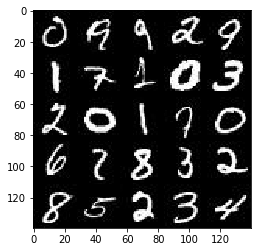

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
[CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) 是一个包含 20 多万张名人图片及相关图片说明的数据集。你将用此数据集生成人脸，不会用不到相关说明。你可以更改 `show_n_images` 探索此数据集。

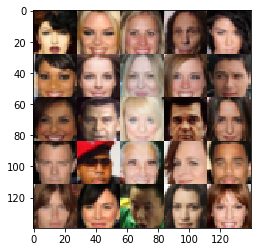

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## 预处理数据（Preprocess the Data）
由于该项目的重点是建立 GANs 模型，我们将为你预处理数据。

经过数据预处理，MNIST 和 CelebA 数据集的值在 28×28 维度图像的 [-0.5, 0.5] 范围内。CelebA 数据集中的图像裁剪了非脸部的图像部分，然后调整到 28x28 维度。

MNIST 数据集中的图像是单[通道](https://en.wikipedia.org/wiki/Channel_(digital_image%29)的黑白图像，CelebA 数据集中的图像是 [三通道的 RGB 彩色图像](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images)。

## 建立神经网络（Build the Neural Network）
你将通过部署以下函数来建立 GANs 的主要组成部分:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### 检查 TensorFlow 版本并获取 GPU 型号
检查你是否使用正确的 TensorFlow 版本，并获取 GPU 型号

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### 输入（Input）
部署 `model_inputs` 函数以创建用于神经网络的 [占位符 (TF Placeholders)](https://www.tensorflow.org/versions/r0.11/api_docs/python/io_ops/placeholders)。请创建以下占位符：
- 输入图像占位符: 使用 `image_width`，`image_height` 和 `image_channels` 设置为 rank 4。
- 输入 Z 占位符: 设置为 rank 2，并命名为 `z_dim`。
- 学习速率占位符: 设置为 rank 0。

返回占位符元组的形状为 (tensor of real input images, tensor of z data, learning rate)。


In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
   
    learn_rate=tf.placeholder(tf.float32)
    input_real=tf.placeholder(tf.float32,(None,image_width,image_height,image_channels))
    input_z=tf.placeholder(tf.float32,(None,z_dim))
    return input_real, input_z, learn_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

tests.test_model_inputs(model_inputs)


Tests Passed


### 辨别器（Discriminator）
部署 `discriminator` 函数创建辨别器神经网络以辨别 `images`。该函数应能够重复使用神经网络中的各种变量。 在 [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) 中使用 "discriminator" 的变量空间名来重复使用该函数中的变量。 

该函数应返回形如 (tensor output of the discriminator, tensor logits of the discriminator) 的元组。

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """

    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
   
        alpha=0.01

        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
       
        x1=tf.maximum(alpha*x1,x1)
        x1=tf.layers.dropout(x1,rate=0.5)
        
        x2 = tf.layers.conv2d(x1, 128, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training = True)
        x2=tf.maximum(alpha*x2,x2)
        x2=tf.layers.dropout(x2,rate=0.5)
        
        x3 = tf.layers.conv2d(x2, 256, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training = True)
        x3=tf.maximum(alpha*x3,x3)
        x3=tf.layers.dropout(x3,rate=0.5)
    
#         x4 = tf.layers.conv2d(x3, 576, 5, strides=1, padding='same')
#         x4 = tf.layers.batch_normalization(x4, training = True)
#         x4=tf.maximum(alpha*x4,x4)
        
         
       
        
        # Flatten it
        flat = tf.reshape(x3, (-1, 4*4*256))

        logits = tf.layers.dense(flat, 1)
        output = tf.sigmoid(logits)

     
        
        return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### 生成器（Generator）
部署 `generator` 函数以使用 `z` 生成图像。该函数应能够重复使用神经网络中的各种变量。
在 [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) 中使用 "generator" 的变量空间名来重复使用该函数中的变量。 

该函数应返回所生成的 28 x 28 x `out_channel_dim` 维度图像。

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function

    with tf.variable_scope('generator', reuse=(not is_train)):
        alpha=0.01
        # First fully connected layer
        x1 = tf.layers.dense(z, 28*28*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 28, 28, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 4x4x512 now
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=1, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 8x8x256 now
        
        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=1, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        # 16x16x128 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='same')
        # 32x32x3 now
        
        out = tf.tanh(logits)
        
        return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### 损失函数（Loss）
部署 `model_loss` 函数训练并计算 GANs 的损失。该函数应返回形如 (discriminator loss, generator loss) 的元组。

使用你已实现的函数：
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### 优化（Optimization）
部署 `model_opt` 函数实现对 GANs 的优化。使用 [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) 获取可训练的所有变量。通过变量空间名 `discriminator` 和 `generator` 来过滤变量。该函数应返回形如 (discriminator training operation, generator training operation) 的元组。

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## 训练神经网络（Neural Network Training）
### 输出显示
使用该函数可以显示生成器 (Generator) 在训练过程中的当前输出，这会帮你评估 GANs 模型的训练程度。

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### 训练
部署 `train` 函数以建立并训练 GANs 模型。记得使用以下你已完成的函数：
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

使用 `show_generator_output` 函数显示 `generator` 在训练过程中的输出。

**注意**：在每个批次 (batch) 中运行 `show_generator_output` 函数会显著增加训练时间与该 notebook 的体积。推荐每 100 批次输出一次 `generator` 的输出。 

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
  


    input_real, input_z,lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)

    d_loss, g_loss = model_loss(input_real,input_z,data_shape[3])

    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
        
 
    steps = 0
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):     
                batch_images=batch_images*2
                steps += 1


                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))             
                _ = sess.run(d_opt, feed_dict={input_real: batch_images,input_z: batch_z,lr:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images,input_z: batch_z,lr:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images,input_z: batch_z,lr:learning_rate})
#                
             # At the end of each epoch, get the losses and print them out
                train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                train_loss_g = g_loss.eval({input_z: batch_z, input_real: batch_images})
                print("Epoch {}/{}...".format(epoch_i+1, epochs),
                      "Discriminator Loss: {:.4f}...".format(train_loss_d),
                      "Generator Loss: {:.4f}".format(train_loss_g))    
                      
                if steps % 100 == 0 :
                    show_generator_output(sess, 10, input_z, data_shape[3], data_image_mode)   


### MNIST
在 MNIST 上测试你的 GANs 模型。经过 2 次迭代，GANs 应该能够生成类似手写数字的图像。确保生成器 (generator) 低于辨别器 (discriminator) 的损失，或接近 0。

Epoch 1/2... Discriminator Loss: 7.1524... Generator Loss: 0.2355
Epoch 1/2... Discriminator Loss: 9.6452... Generator Loss: 0.0003
Epoch 1/2... Discriminator Loss: 3.8589... Generator Loss: 0.1545
Epoch 1/2... Discriminator Loss: 5.2927... Generator Loss: 0.7751
Epoch 1/2... Discriminator Loss: 4.3302... Generator Loss: 0.0288
Epoch 1/2... Discriminator Loss: 3.8604... Generator Loss: 0.4144
Epoch 1/2... Discriminator Loss: 3.9281... Generator Loss: 0.0347
Epoch 1/2... Discriminator Loss: 3.5753... Generator Loss: 0.2326
Epoch 1/2... Discriminator Loss: 4.0445... Generator Loss: 0.0414
Epoch 1/2... Discriminator Loss: 2.9734... Generator Loss: 0.1720
Epoch 1/2... Discriminator Loss: 3.4240... Generator Loss: 0.0722
Epoch 1/2... Discriminator Loss: 3.0341... Generator Loss: 0.2291
Epoch 1/2... Discriminator Loss: 3.1594... Generator Loss: 0.1384
Epoch 1/2... Discriminator Loss: 3.2903... Generator Loss: 0.0837
Epoch 1/2... Discriminator Loss: 3.4087... Generator Loss: 0.1856
Epoch 1/2.

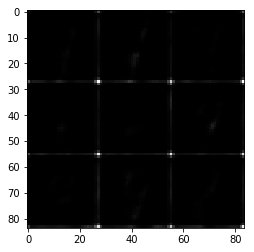

Epoch 1/2... Discriminator Loss: 1.5098... Generator Loss: 0.5692
Epoch 1/2... Discriminator Loss: 1.6767... Generator Loss: 0.4034
Epoch 1/2... Discriminator Loss: 1.8439... Generator Loss: 0.4419
Epoch 1/2... Discriminator Loss: 2.1120... Generator Loss: 0.2725
Epoch 1/2... Discriminator Loss: 2.1033... Generator Loss: 0.3168
Epoch 1/2... Discriminator Loss: 1.9677... Generator Loss: 0.4114
Epoch 1/2... Discriminator Loss: 1.9420... Generator Loss: 0.2793
Epoch 1/2... Discriminator Loss: 2.0185... Generator Loss: 0.4524
Epoch 1/2... Discriminator Loss: 2.0847... Generator Loss: 0.2635
Epoch 1/2... Discriminator Loss: 1.8284... Generator Loss: 0.5447
Epoch 1/2... Discriminator Loss: 1.9672... Generator Loss: 0.3406
Epoch 1/2... Discriminator Loss: 1.7996... Generator Loss: 0.5058
Epoch 1/2... Discriminator Loss: 1.7112... Generator Loss: 0.4104
Epoch 1/2... Discriminator Loss: 1.9618... Generator Loss: 0.3458
Epoch 1/2... Discriminator Loss: 1.9143... Generator Loss: 0.5497
Epoch 1/2.

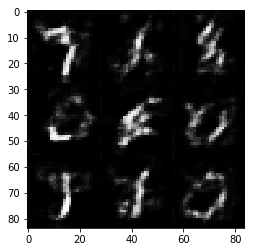

Epoch 1/2... Discriminator Loss: 1.7544... Generator Loss: 0.4246
Epoch 1/2... Discriminator Loss: 1.7441... Generator Loss: 0.4594
Epoch 1/2... Discriminator Loss: 1.7351... Generator Loss: 0.4159
Epoch 1/2... Discriminator Loss: 1.6070... Generator Loss: 0.5292
Epoch 1/2... Discriminator Loss: 1.6576... Generator Loss: 0.4096
Epoch 1/2... Discriminator Loss: 1.7211... Generator Loss: 0.6335
Epoch 1/2... Discriminator Loss: 1.8163... Generator Loss: 0.2887
Epoch 1/2... Discriminator Loss: 1.6915... Generator Loss: 0.8402
Epoch 1/2... Discriminator Loss: 1.8014... Generator Loss: 0.2693
Epoch 1/2... Discriminator Loss: 1.6288... Generator Loss: 0.8392
Epoch 1/2... Discriminator Loss: 1.8521... Generator Loss: 0.2696
Epoch 1/2... Discriminator Loss: 1.8723... Generator Loss: 0.5788
Epoch 1/2... Discriminator Loss: 1.8617... Generator Loss: 0.3171
Epoch 1/2... Discriminator Loss: 1.7132... Generator Loss: 0.5066
Epoch 1/2... Discriminator Loss: 1.6543... Generator Loss: 0.4726
Epoch 1/2.

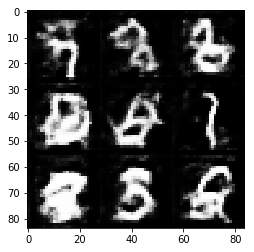

Epoch 1/2... Discriminator Loss: 1.6509... Generator Loss: 0.8679
Epoch 1/2... Discriminator Loss: 1.7126... Generator Loss: 0.3628
Epoch 1/2... Discriminator Loss: 1.4894... Generator Loss: 0.5712
Epoch 1/2... Discriminator Loss: 1.5470... Generator Loss: 0.5686
Epoch 1/2... Discriminator Loss: 1.5926... Generator Loss: 0.4324
Epoch 1/2... Discriminator Loss: 1.6001... Generator Loss: 0.5109
Epoch 1/2... Discriminator Loss: 1.5982... Generator Loss: 0.4496
Epoch 1/2... Discriminator Loss: 1.5560... Generator Loss: 0.6435
Epoch 1/2... Discriminator Loss: 1.7241... Generator Loss: 0.3481
Epoch 1/2... Discriminator Loss: 1.5915... Generator Loss: 0.6882
Epoch 1/2... Discriminator Loss: 1.6802... Generator Loss: 0.3725
Epoch 1/2... Discriminator Loss: 1.5909... Generator Loss: 0.5498
Epoch 1/2... Discriminator Loss: 1.5071... Generator Loss: 0.5429
Epoch 1/2... Discriminator Loss: 1.5293... Generator Loss: 0.5049
Epoch 1/2... Discriminator Loss: 1.5950... Generator Loss: 0.4604
Epoch 1/2.

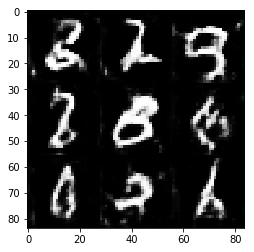

Epoch 1/2... Discriminator Loss: 1.6556... Generator Loss: 0.8051
Epoch 1/2... Discriminator Loss: 1.7942... Generator Loss: 0.2666
Epoch 1/2... Discriminator Loss: 1.6445... Generator Loss: 0.8982
Epoch 1/2... Discriminator Loss: 1.6407... Generator Loss: 0.3163
Epoch 1/2... Discriminator Loss: 1.4998... Generator Loss: 0.6991
Epoch 1/2... Discriminator Loss: 1.5797... Generator Loss: 0.4726
Epoch 1/2... Discriminator Loss: 1.5411... Generator Loss: 0.5039
Epoch 1/2... Discriminator Loss: 1.6478... Generator Loss: 0.4231
Epoch 1/2... Discriminator Loss: 1.5965... Generator Loss: 0.4909
Epoch 1/2... Discriminator Loss: 1.5010... Generator Loss: 0.5635
Epoch 1/2... Discriminator Loss: 1.5775... Generator Loss: 0.4967
Epoch 1/2... Discriminator Loss: 1.4914... Generator Loss: 0.5113
Epoch 1/2... Discriminator Loss: 1.5817... Generator Loss: 0.4175
Epoch 1/2... Discriminator Loss: 1.6696... Generator Loss: 0.4359
Epoch 1/2... Discriminator Loss: 1.6676... Generator Loss: 0.5896
Epoch 1/2.

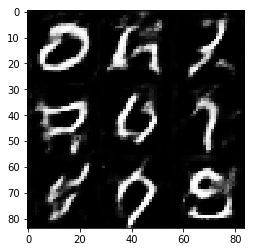

Epoch 1/2... Discriminator Loss: 1.7323... Generator Loss: 0.3696
Epoch 1/2... Discriminator Loss: 1.6907... Generator Loss: 0.4463
Epoch 1/2... Discriminator Loss: 1.4898... Generator Loss: 0.6997
Epoch 1/2... Discriminator Loss: 2.0243... Generator Loss: 0.1813
Epoch 1/2... Discriminator Loss: 1.9537... Generator Loss: 1.1267
Epoch 1/2... Discriminator Loss: 1.7407... Generator Loss: 0.2907
Epoch 1/2... Discriminator Loss: 1.4969... Generator Loss: 0.5335
Epoch 1/2... Discriminator Loss: 1.4325... Generator Loss: 0.6875
Epoch 1/2... Discriminator Loss: 1.7659... Generator Loss: 0.3075
Epoch 1/2... Discriminator Loss: 1.6264... Generator Loss: 0.4828
Epoch 1/2... Discriminator Loss: 1.5571... Generator Loss: 0.4942
Epoch 1/2... Discriminator Loss: 1.6443... Generator Loss: 0.4034
Epoch 1/2... Discriminator Loss: 1.5847... Generator Loss: 0.4603
Epoch 1/2... Discriminator Loss: 1.7655... Generator Loss: 0.4353
Epoch 1/2... Discriminator Loss: 1.5976... Generator Loss: 0.4018
Epoch 1/2.

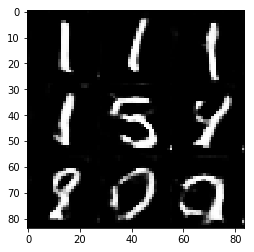

Epoch 1/2... Discriminator Loss: 1.7428... Generator Loss: 0.3823
Epoch 1/2... Discriminator Loss: 1.6486... Generator Loss: 0.4332
Epoch 1/2... Discriminator Loss: 1.6800... Generator Loss: 0.4244
Epoch 1/2... Discriminator Loss: 1.6398... Generator Loss: 0.3561
Epoch 1/2... Discriminator Loss: 1.5195... Generator Loss: 0.6114
Epoch 1/2... Discriminator Loss: 1.7018... Generator Loss: 0.3134
Epoch 1/2... Discriminator Loss: 1.6624... Generator Loss: 0.4285
Epoch 1/2... Discriminator Loss: 1.6474... Generator Loss: 0.4787
Epoch 1/2... Discriminator Loss: 1.7019... Generator Loss: 0.3093
Epoch 1/2... Discriminator Loss: 1.4845... Generator Loss: 0.5641
Epoch 1/2... Discriminator Loss: 1.6766... Generator Loss: 0.3235
Epoch 1/2... Discriminator Loss: 1.6005... Generator Loss: 0.5549
Epoch 1/2... Discriminator Loss: 1.7947... Generator Loss: 0.2882
Epoch 1/2... Discriminator Loss: 1.4966... Generator Loss: 0.5691
Epoch 1/2... Discriminator Loss: 1.7887... Generator Loss: 0.3029
Epoch 1/2.

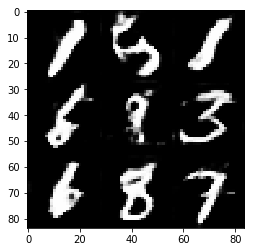

Epoch 1/2... Discriminator Loss: 1.7677... Generator Loss: 0.2930
Epoch 1/2... Discriminator Loss: 1.5690... Generator Loss: 0.6796
Epoch 1/2... Discriminator Loss: 1.5887... Generator Loss: 0.3636
Epoch 1/2... Discriminator Loss: 1.7962... Generator Loss: 0.4528
Epoch 1/2... Discriminator Loss: 1.5265... Generator Loss: 0.4135
Epoch 1/2... Discriminator Loss: 1.6637... Generator Loss: 0.3591
Epoch 1/2... Discriminator Loss: 1.7386... Generator Loss: 0.3716
Epoch 1/2... Discriminator Loss: 1.4163... Generator Loss: 0.8150
Epoch 1/2... Discriminator Loss: 1.6691... Generator Loss: 0.2997
Epoch 1/2... Discriminator Loss: 1.7083... Generator Loss: 0.3561
Epoch 1/2... Discriminator Loss: 1.7337... Generator Loss: 0.5523
Epoch 1/2... Discriminator Loss: 1.6957... Generator Loss: 0.3006
Epoch 1/2... Discriminator Loss: 1.7423... Generator Loss: 0.5896
Epoch 1/2... Discriminator Loss: 2.1742... Generator Loss: 0.1604
Epoch 1/2... Discriminator Loss: 1.7454... Generator Loss: 0.6740
Epoch 1/2.

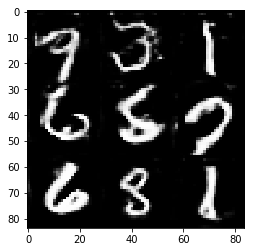

Epoch 1/2... Discriminator Loss: 1.6579... Generator Loss: 0.4787
Epoch 1/2... Discriminator Loss: 1.8614... Generator Loss: 0.2624
Epoch 1/2... Discriminator Loss: 1.3774... Generator Loss: 0.6140
Epoch 1/2... Discriminator Loss: 1.6138... Generator Loss: 0.4713
Epoch 1/2... Discriminator Loss: 2.3719... Generator Loss: 0.1306
Epoch 1/2... Discriminator Loss: 1.4477... Generator Loss: 1.0372
Epoch 1/2... Discriminator Loss: 1.8436... Generator Loss: 0.2428
Epoch 1/2... Discriminator Loss: 1.5691... Generator Loss: 0.4881
Epoch 1/2... Discriminator Loss: 1.5555... Generator Loss: 0.5036
Epoch 1/2... Discriminator Loss: 1.9499... Generator Loss: 0.2291
Epoch 1/2... Discriminator Loss: 1.3615... Generator Loss: 0.7746
Epoch 1/2... Discriminator Loss: 1.7153... Generator Loss: 0.3011
Epoch 1/2... Discriminator Loss: 1.6398... Generator Loss: 0.4929
Epoch 1/2... Discriminator Loss: 1.9106... Generator Loss: 0.2266
Epoch 1/2... Discriminator Loss: 1.4928... Generator Loss: 0.6392
Epoch 1/2.

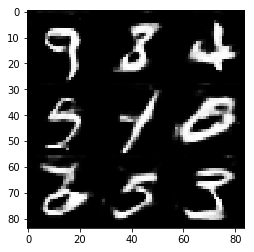

Epoch 1/2... Discriminator Loss: 1.5002... Generator Loss: 0.8262
Epoch 1/2... Discriminator Loss: 1.9226... Generator Loss: 0.2209
Epoch 1/2... Discriminator Loss: 1.6814... Generator Loss: 0.8269
Epoch 1/2... Discriminator Loss: 1.8338... Generator Loss: 0.2383
Epoch 1/2... Discriminator Loss: 1.5336... Generator Loss: 0.7565
Epoch 1/2... Discriminator Loss: 1.5782... Generator Loss: 0.3759
Epoch 1/2... Discriminator Loss: 1.9378... Generator Loss: 0.2278
Epoch 1/2... Discriminator Loss: 1.4456... Generator Loss: 0.7825
Epoch 1/2... Discriminator Loss: 2.0700... Generator Loss: 0.1865
Epoch 1/2... Discriminator Loss: 1.6767... Generator Loss: 0.4795
Epoch 1/2... Discriminator Loss: 1.7369... Generator Loss: 0.3738
Epoch 1/2... Discriminator Loss: 1.7735... Generator Loss: 0.3088
Epoch 1/2... Discriminator Loss: 1.6879... Generator Loss: 0.4253
Epoch 1/2... Discriminator Loss: 1.7956... Generator Loss: 0.2772
Epoch 1/2... Discriminator Loss: 1.4539... Generator Loss: 0.5952
Epoch 1/2.

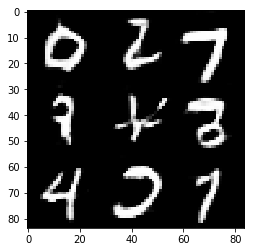

Epoch 1/2... Discriminator Loss: 1.4380... Generator Loss: 0.4687
Epoch 1/2... Discriminator Loss: 2.0476... Generator Loss: 0.1872
Epoch 1/2... Discriminator Loss: 1.3249... Generator Loss: 0.8525
Epoch 1/2... Discriminator Loss: 1.9945... Generator Loss: 0.1965
Epoch 1/2... Discriminator Loss: 1.7749... Generator Loss: 0.7395
Epoch 1/2... Discriminator Loss: 1.9320... Generator Loss: 0.2257
Epoch 1/2... Discriminator Loss: 1.5030... Generator Loss: 0.5354
Epoch 1/2... Discriminator Loss: 1.5645... Generator Loss: 0.3317
Epoch 1/2... Discriminator Loss: 1.4097... Generator Loss: 0.9468
Epoch 1/2... Discriminator Loss: 2.0541... Generator Loss: 0.1993
Epoch 1/2... Discriminator Loss: 1.4902... Generator Loss: 0.6300
Epoch 1/2... Discriminator Loss: 1.9123... Generator Loss: 0.2467
Epoch 1/2... Discriminator Loss: 1.7538... Generator Loss: 0.4109
Epoch 1/2... Discriminator Loss: 1.4473... Generator Loss: 0.5879
Epoch 1/2... Discriminator Loss: 1.5108... Generator Loss: 0.3897
Epoch 1/2.

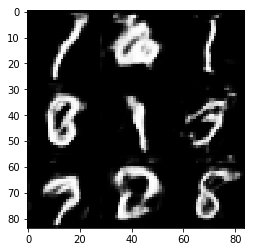

Epoch 1/2... Discriminator Loss: 1.7678... Generator Loss: 0.2710
Epoch 1/2... Discriminator Loss: 1.5038... Generator Loss: 0.5403
Epoch 1/2... Discriminator Loss: 2.0158... Generator Loss: 0.2085
Epoch 1/2... Discriminator Loss: 1.3675... Generator Loss: 0.5971
Epoch 1/2... Discriminator Loss: 1.3874... Generator Loss: 0.4791
Epoch 1/2... Discriminator Loss: 1.5476... Generator Loss: 0.3695
Epoch 1/2... Discriminator Loss: 1.6448... Generator Loss: 0.4103
Epoch 1/2... Discriminator Loss: 1.7735... Generator Loss: 0.3234
Epoch 1/2... Discriminator Loss: 2.1006... Generator Loss: 0.2474
Epoch 1/2... Discriminator Loss: 1.6184... Generator Loss: 0.3861
Epoch 1/2... Discriminator Loss: 1.3983... Generator Loss: 0.4820
Epoch 1/2... Discriminator Loss: 1.5465... Generator Loss: 0.3763
Epoch 1/2... Discriminator Loss: 1.6546... Generator Loss: 0.4393
Epoch 1/2... Discriminator Loss: 2.0979... Generator Loss: 0.2018
Epoch 1/2... Discriminator Loss: 1.5362... Generator Loss: 1.3222
Epoch 1/2.

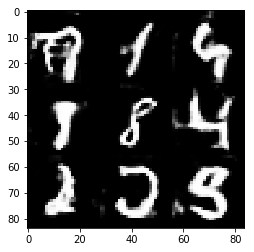

Epoch 1/2... Discriminator Loss: 1.6550... Generator Loss: 0.3526
Epoch 1/2... Discriminator Loss: 1.6424... Generator Loss: 0.4124
Epoch 1/2... Discriminator Loss: 1.8861... Generator Loss: 0.2344
Epoch 1/2... Discriminator Loss: 1.7659... Generator Loss: 0.9063
Epoch 1/2... Discriminator Loss: 1.6244... Generator Loss: 0.2796
Epoch 1/2... Discriminator Loss: 1.7537... Generator Loss: 0.2854
Epoch 1/2... Discriminator Loss: 1.5614... Generator Loss: 0.7115
Epoch 1/2... Discriminator Loss: 2.5004... Generator Loss: 0.1142
Epoch 1/2... Discriminator Loss: 1.3983... Generator Loss: 0.5524
Epoch 1/2... Discriminator Loss: 1.6698... Generator Loss: 0.3925
Epoch 1/2... Discriminator Loss: 1.7352... Generator Loss: 0.2847
Epoch 1/2... Discriminator Loss: 1.3335... Generator Loss: 0.8492
Epoch 1/2... Discriminator Loss: 2.1806... Generator Loss: 0.1594
Epoch 1/2... Discriminator Loss: 1.4118... Generator Loss: 0.5150
Epoch 1/2... Discriminator Loss: 1.4448... Generator Loss: 0.4238
Epoch 1/2.

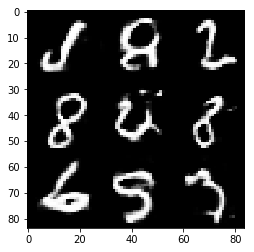

Epoch 1/2... Discriminator Loss: 1.7277... Generator Loss: 0.3500
Epoch 1/2... Discriminator Loss: 1.8800... Generator Loss: 0.2749
Epoch 1/2... Discriminator Loss: 1.8397... Generator Loss: 0.3689
Epoch 1/2... Discriminator Loss: 1.8754... Generator Loss: 0.2633
Epoch 1/2... Discriminator Loss: 1.9804... Generator Loss: 0.2206
Epoch 1/2... Discriminator Loss: 1.6454... Generator Loss: 0.4957
Epoch 1/2... Discriminator Loss: 1.9709... Generator Loss: 0.2527
Epoch 1/2... Discriminator Loss: 2.0220... Generator Loss: 0.2195
Epoch 1/2... Discriminator Loss: 1.6912... Generator Loss: 0.4402
Epoch 1/2... Discriminator Loss: 1.6237... Generator Loss: 0.3197
Epoch 1/2... Discriminator Loss: 1.4812... Generator Loss: 0.5091
Epoch 1/2... Discriminator Loss: 2.1284... Generator Loss: 0.1841
Epoch 1/2... Discriminator Loss: 1.2867... Generator Loss: 0.9849
Epoch 1/2... Discriminator Loss: 1.8414... Generator Loss: 0.2352
Epoch 1/2... Discriminator Loss: 1.9397... Generator Loss: 0.2311
Epoch 1/2.

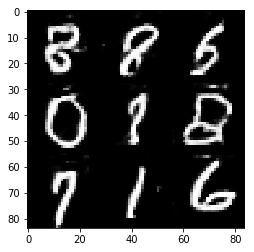

Epoch 1/2... Discriminator Loss: 1.7025... Generator Loss: 0.3199
Epoch 1/2... Discriminator Loss: 1.7209... Generator Loss: 0.3146
Epoch 1/2... Discriminator Loss: 1.2003... Generator Loss: 0.8238
Epoch 1/2... Discriminator Loss: 1.5213... Generator Loss: 0.3617
Epoch 1/2... Discriminator Loss: 1.5253... Generator Loss: 0.3466
Epoch 1/2... Discriminator Loss: 1.6960... Generator Loss: 0.3086
Epoch 1/2... Discriminator Loss: 1.4489... Generator Loss: 0.6131
Epoch 1/2... Discriminator Loss: 2.5669... Generator Loss: 0.0910
Epoch 1/2... Discriminator Loss: 2.8983... Generator Loss: 2.2127
Epoch 1/2... Discriminator Loss: 1.8381... Generator Loss: 0.2218
Epoch 1/2... Discriminator Loss: 1.5079... Generator Loss: 0.6158
Epoch 1/2... Discriminator Loss: 1.4310... Generator Loss: 0.5069
Epoch 1/2... Discriminator Loss: 1.1230... Generator Loss: 0.6520
Epoch 1/2... Discriminator Loss: 1.5128... Generator Loss: 0.4400
Epoch 1/2... Discriminator Loss: 1.4692... Generator Loss: 0.5478
Epoch 1/2.

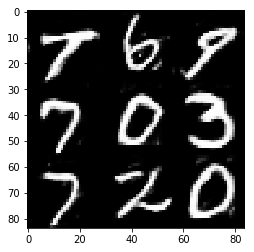

Epoch 1/2... Discriminator Loss: 1.7962... Generator Loss: 0.2432
Epoch 1/2... Discriminator Loss: 1.5922... Generator Loss: 0.3732
Epoch 1/2... Discriminator Loss: 1.7893... Generator Loss: 0.2319
Epoch 1/2... Discriminator Loss: 1.6224... Generator Loss: 0.3808
Epoch 1/2... Discriminator Loss: 1.8527... Generator Loss: 0.2497
Epoch 1/2... Discriminator Loss: 1.6455... Generator Loss: 0.4897
Epoch 1/2... Discriminator Loss: 2.7026... Generator Loss: 0.0923
Epoch 1/2... Discriminator Loss: 1.4397... Generator Loss: 0.8635
Epoch 1/2... Discriminator Loss: 1.5534... Generator Loss: 0.5094
Epoch 1/2... Discriminator Loss: 2.3019... Generator Loss: 0.1395
Epoch 1/2... Discriminator Loss: 1.3663... Generator Loss: 0.9898
Epoch 1/2... Discriminator Loss: 2.0243... Generator Loss: 0.1956
Epoch 1/2... Discriminator Loss: 1.6606... Generator Loss: 0.3607
Epoch 1/2... Discriminator Loss: 1.4249... Generator Loss: 0.5466
Epoch 1/2... Discriminator Loss: 2.0093... Generator Loss: 0.1899
Epoch 1/2.

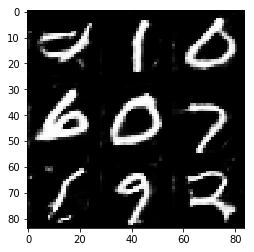

Epoch 1/2... Discriminator Loss: 1.3244... Generator Loss: 0.5517
Epoch 1/2... Discriminator Loss: 2.2751... Generator Loss: 0.1559
Epoch 1/2... Discriminator Loss: 1.8522... Generator Loss: 0.2749
Epoch 1/2... Discriminator Loss: 1.8303... Generator Loss: 0.3604
Epoch 1/2... Discriminator Loss: 1.6103... Generator Loss: 0.4248
Epoch 1/2... Discriminator Loss: 1.9240... Generator Loss: 0.2269
Epoch 1/2... Discriminator Loss: 2.0966... Generator Loss: 0.1902
Epoch 1/2... Discriminator Loss: 1.4990... Generator Loss: 0.4988
Epoch 1/2... Discriminator Loss: 1.8677... Generator Loss: 0.2851
Epoch 1/2... Discriminator Loss: 1.9974... Generator Loss: 0.2085
Epoch 1/2... Discriminator Loss: 1.3055... Generator Loss: 0.5164
Epoch 1/2... Discriminator Loss: 1.3018... Generator Loss: 0.6119
Epoch 1/2... Discriminator Loss: 1.6355... Generator Loss: 0.3089
Epoch 1/2... Discriminator Loss: 1.7935... Generator Loss: 0.3122
Epoch 1/2... Discriminator Loss: 1.7157... Generator Loss: 0.3094
Epoch 1/2.

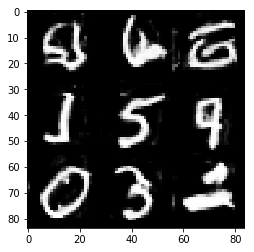

Epoch 1/2... Discriminator Loss: 1.6284... Generator Loss: 0.4644
Epoch 1/2... Discriminator Loss: 2.3015... Generator Loss: 0.1496
Epoch 1/2... Discriminator Loss: 1.9008... Generator Loss: 0.3535
Epoch 1/2... Discriminator Loss: 1.8657... Generator Loss: 0.2755
Epoch 1/2... Discriminator Loss: 1.8746... Generator Loss: 0.2421
Epoch 1/2... Discriminator Loss: 1.4121... Generator Loss: 0.4705
Epoch 1/2... Discriminator Loss: 1.6244... Generator Loss: 0.3467
Epoch 1/2... Discriminator Loss: 1.3576... Generator Loss: 0.4494
Epoch 1/2... Discriminator Loss: 2.1700... Generator Loss: 0.1794
Epoch 1/2... Discriminator Loss: 1.4090... Generator Loss: 0.5871
Epoch 1/2... Discriminator Loss: 1.9042... Generator Loss: 0.2290
Epoch 1/2... Discriminator Loss: 1.5933... Generator Loss: 0.9926
Epoch 1/2... Discriminator Loss: 2.4536... Generator Loss: 0.1140
Epoch 1/2... Discriminator Loss: 1.6151... Generator Loss: 0.6772
Epoch 1/2... Discriminator Loss: 2.5198... Generator Loss: 0.1118
Epoch 1/2.

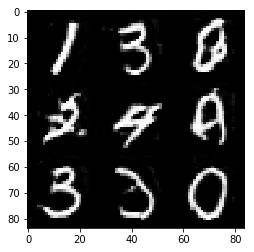

Epoch 1/2... Discriminator Loss: 1.6275... Generator Loss: 0.4494
Epoch 1/2... Discriminator Loss: 1.7028... Generator Loss: 0.3268
Epoch 1/2... Discriminator Loss: 2.3335... Generator Loss: 0.1365
Epoch 1/2... Discriminator Loss: 1.5464... Generator Loss: 0.4707
Epoch 1/2... Discriminator Loss: 2.2114... Generator Loss: 0.1671
Epoch 1/2... Discriminator Loss: 2.2083... Generator Loss: 0.1743
Epoch 1/2... Discriminator Loss: 1.5953... Generator Loss: 0.6304
Epoch 1/2... Discriminator Loss: 1.8257... Generator Loss: 0.2286
Epoch 1/2... Discriminator Loss: 1.7045... Generator Loss: 0.4502
Epoch 1/2... Discriminator Loss: 2.1255... Generator Loss: 0.1885
Epoch 1/2... Discriminator Loss: 1.8848... Generator Loss: 0.2589
Epoch 1/2... Discriminator Loss: 1.6383... Generator Loss: 0.5060
Epoch 1/2... Discriminator Loss: 1.6894... Generator Loss: 0.3305
Epoch 1/2... Discriminator Loss: 1.4703... Generator Loss: 0.3595
Epoch 1/2... Discriminator Loss: 1.5754... Generator Loss: 0.3473
Epoch 1/2.

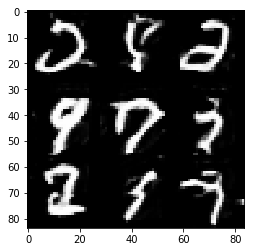

Epoch 2/2... Discriminator Loss: 2.8784... Generator Loss: 0.0863
Epoch 2/2... Discriminator Loss: 2.0390... Generator Loss: 0.7803
Epoch 2/2... Discriminator Loss: 2.0229... Generator Loss: 0.1819
Epoch 2/2... Discriminator Loss: 1.3309... Generator Loss: 0.5784
Epoch 2/2... Discriminator Loss: 1.9300... Generator Loss: 0.2419
Epoch 2/2... Discriminator Loss: 1.9073... Generator Loss: 0.2257
Epoch 2/2... Discriminator Loss: 1.6126... Generator Loss: 0.6390
Epoch 2/2... Discriminator Loss: 1.6669... Generator Loss: 0.3671
Epoch 2/2... Discriminator Loss: 1.8228... Generator Loss: 0.2844
Epoch 2/2... Discriminator Loss: 1.3723... Generator Loss: 0.5220
Epoch 2/2... Discriminator Loss: 1.5561... Generator Loss: 0.3320
Epoch 2/2... Discriminator Loss: 1.2627... Generator Loss: 0.5404
Epoch 2/2... Discriminator Loss: 1.6491... Generator Loss: 0.3032
Epoch 2/2... Discriminator Loss: 1.9114... Generator Loss: 0.2339
Epoch 2/2... Discriminator Loss: 1.4894... Generator Loss: 0.5252
Epoch 2/2.

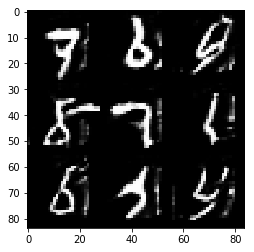

Epoch 2/2... Discriminator Loss: 2.0318... Generator Loss: 0.3067
Epoch 2/2... Discriminator Loss: 1.5908... Generator Loss: 0.5113
Epoch 2/2... Discriminator Loss: 1.9474... Generator Loss: 0.2089
Epoch 2/2... Discriminator Loss: 1.9927... Generator Loss: 0.2106
Epoch 2/2... Discriminator Loss: 1.6774... Generator Loss: 0.6797
Epoch 2/2... Discriminator Loss: 1.9458... Generator Loss: 0.2157
Epoch 2/2... Discriminator Loss: 1.5704... Generator Loss: 0.3924
Epoch 2/2... Discriminator Loss: 1.3946... Generator Loss: 0.4445
Epoch 2/2... Discriminator Loss: 1.4377... Generator Loss: 0.4368
Epoch 2/2... Discriminator Loss: 1.8253... Generator Loss: 0.2602
Epoch 2/2... Discriminator Loss: 1.5586... Generator Loss: 0.3512
Epoch 2/2... Discriminator Loss: 1.4791... Generator Loss: 0.4711
Epoch 2/2... Discriminator Loss: 1.8504... Generator Loss: 0.2484
Epoch 2/2... Discriminator Loss: 1.7043... Generator Loss: 0.5405
Epoch 2/2... Discriminator Loss: 1.5410... Generator Loss: 0.3617
Epoch 2/2.

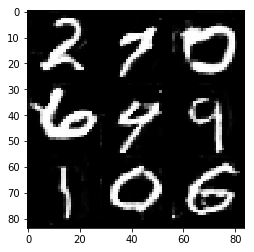

Epoch 2/2... Discriminator Loss: 1.8572... Generator Loss: 0.2465
Epoch 2/2... Discriminator Loss: 1.8945... Generator Loss: 0.3923
Epoch 2/2... Discriminator Loss: 1.5201... Generator Loss: 0.3969
Epoch 2/2... Discriminator Loss: 2.0366... Generator Loss: 0.2239
Epoch 2/2... Discriminator Loss: 1.4494... Generator Loss: 0.5242
Epoch 2/2... Discriminator Loss: 1.9947... Generator Loss: 0.3332
Epoch 2/2... Discriminator Loss: 2.9620... Generator Loss: 0.0773
Epoch 2/2... Discriminator Loss: 2.1774... Generator Loss: 1.5183
Epoch 2/2... Discriminator Loss: 2.4426... Generator Loss: 0.1758
Epoch 2/2... Discriminator Loss: 1.7518... Generator Loss: 0.3385
Epoch 2/2... Discriminator Loss: 1.5438... Generator Loss: 0.4077
Epoch 2/2... Discriminator Loss: 1.9836... Generator Loss: 0.2350
Epoch 2/2... Discriminator Loss: 1.6614... Generator Loss: 0.3437
Epoch 2/2... Discriminator Loss: 2.1331... Generator Loss: 0.1779
Epoch 2/2... Discriminator Loss: 0.9981... Generator Loss: 0.8887
Epoch 2/2.

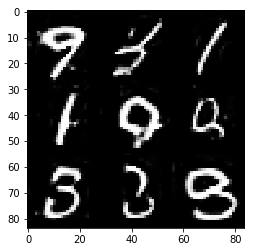

Epoch 2/2... Discriminator Loss: 1.2564... Generator Loss: 0.4396
Epoch 2/2... Discriminator Loss: 1.9086... Generator Loss: 0.2631
Epoch 2/2... Discriminator Loss: 1.2595... Generator Loss: 0.9593
Epoch 2/2... Discriminator Loss: 2.7226... Generator Loss: 0.0959
Epoch 2/2... Discriminator Loss: 2.0626... Generator Loss: 0.3764
Epoch 2/2... Discriminator Loss: 2.5094... Generator Loss: 0.1141
Epoch 2/2... Discriminator Loss: 1.2560... Generator Loss: 0.7164
Epoch 2/2... Discriminator Loss: 1.2729... Generator Loss: 0.4882
Epoch 2/2... Discriminator Loss: 1.4919... Generator Loss: 0.4268
Epoch 2/2... Discriminator Loss: 1.8201... Generator Loss: 0.2580
Epoch 2/2... Discriminator Loss: 1.6661... Generator Loss: 0.4151
Epoch 2/2... Discriminator Loss: 1.1370... Generator Loss: 0.7386
Epoch 2/2... Discriminator Loss: 1.1555... Generator Loss: 0.7037
Epoch 2/2... Discriminator Loss: 1.5767... Generator Loss: 0.4584
Epoch 2/2... Discriminator Loss: 2.2341... Generator Loss: 0.2058
Epoch 2/2.

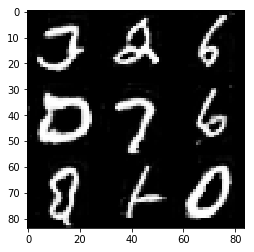

Epoch 2/2... Discriminator Loss: 2.2102... Generator Loss: 0.1759
Epoch 2/2... Discriminator Loss: 1.1051... Generator Loss: 1.0400
Epoch 2/2... Discriminator Loss: 3.0919... Generator Loss: 0.0609
Epoch 2/2... Discriminator Loss: 2.0574... Generator Loss: 0.2557
Epoch 2/2... Discriminator Loss: 1.9336... Generator Loss: 0.3206
Epoch 2/2... Discriminator Loss: 2.2815... Generator Loss: 0.1426
Epoch 2/2... Discriminator Loss: 1.5985... Generator Loss: 0.4260
Epoch 2/2... Discriminator Loss: 1.4646... Generator Loss: 0.4160
Epoch 2/2... Discriminator Loss: 1.4501... Generator Loss: 0.4523
Epoch 2/2... Discriminator Loss: 1.7052... Generator Loss: 0.3190
Epoch 2/2... Discriminator Loss: 1.8450... Generator Loss: 0.2958
Epoch 2/2... Discriminator Loss: 1.9249... Generator Loss: 0.2331
Epoch 2/2... Discriminator Loss: 1.2600... Generator Loss: 0.6011
Epoch 2/2... Discriminator Loss: 2.2556... Generator Loss: 0.1697
Epoch 2/2... Discriminator Loss: 1.8955... Generator Loss: 0.2513
Epoch 2/2.

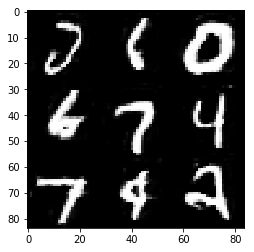

Epoch 2/2... Discriminator Loss: 1.3785... Generator Loss: 0.6759
Epoch 2/2... Discriminator Loss: 1.6219... Generator Loss: 0.4673
Epoch 2/2... Discriminator Loss: 2.0987... Generator Loss: 0.1685
Epoch 2/2... Discriminator Loss: 2.2365... Generator Loss: 0.1777
Epoch 2/2... Discriminator Loss: 1.7070... Generator Loss: 0.3623
Epoch 2/2... Discriminator Loss: 2.5572... Generator Loss: 0.1216
Epoch 2/2... Discriminator Loss: 1.7875... Generator Loss: 0.2943
Epoch 2/2... Discriminator Loss: 1.5712... Generator Loss: 0.3574
Epoch 2/2... Discriminator Loss: 1.6334... Generator Loss: 0.3458
Epoch 2/2... Discriminator Loss: 2.2523... Generator Loss: 0.1757
Epoch 2/2... Discriminator Loss: 1.6588... Generator Loss: 0.3425
Epoch 2/2... Discriminator Loss: 1.6047... Generator Loss: 0.3854
Epoch 2/2... Discriminator Loss: 2.6621... Generator Loss: 0.0884
Epoch 2/2... Discriminator Loss: 0.8375... Generator Loss: 0.8330
Epoch 2/2... Discriminator Loss: 1.8780... Generator Loss: 0.3133
Epoch 2/2.

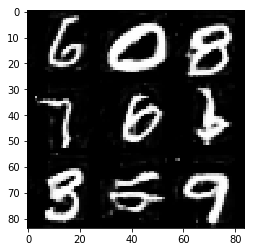

Epoch 2/2... Discriminator Loss: 1.5395... Generator Loss: 0.4382
Epoch 2/2... Discriminator Loss: 1.4403... Generator Loss: 0.5373
Epoch 2/2... Discriminator Loss: 1.8850... Generator Loss: 0.2241
Epoch 2/2... Discriminator Loss: 1.8861... Generator Loss: 0.2638
Epoch 2/2... Discriminator Loss: 1.4399... Generator Loss: 0.8187
Epoch 2/2... Discriminator Loss: 1.9347... Generator Loss: 0.2615
Epoch 2/2... Discriminator Loss: 1.4216... Generator Loss: 1.0695
Epoch 2/2... Discriminator Loss: 3.0583... Generator Loss: 0.0664
Epoch 2/2... Discriminator Loss: 1.3916... Generator Loss: 0.4618
Epoch 2/2... Discriminator Loss: 1.4741... Generator Loss: 0.6451
Epoch 2/2... Discriminator Loss: 1.2616... Generator Loss: 0.4998
Epoch 2/2... Discriminator Loss: 2.2433... Generator Loss: 0.1450
Epoch 2/2... Discriminator Loss: 1.6239... Generator Loss: 0.5401
Epoch 2/2... Discriminator Loss: 1.3441... Generator Loss: 0.6758
Epoch 2/2... Discriminator Loss: 2.3546... Generator Loss: 0.1438
Epoch 2/2.

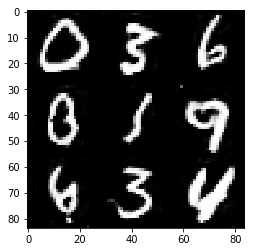

Epoch 2/2... Discriminator Loss: 1.7278... Generator Loss: 0.2813
Epoch 2/2... Discriminator Loss: 2.1898... Generator Loss: 0.1789
Epoch 2/2... Discriminator Loss: 1.8020... Generator Loss: 0.2732
Epoch 2/2... Discriminator Loss: 1.8361... Generator Loss: 0.2748
Epoch 2/2... Discriminator Loss: 1.2787... Generator Loss: 0.6378
Epoch 2/2... Discriminator Loss: 1.8218... Generator Loss: 0.2999
Epoch 2/2... Discriminator Loss: 2.4490... Generator Loss: 0.1251
Epoch 2/2... Discriminator Loss: 1.6765... Generator Loss: 0.6461
Epoch 2/2... Discriminator Loss: 1.0926... Generator Loss: 0.7817
Epoch 2/2... Discriminator Loss: 2.2985... Generator Loss: 0.1795
Epoch 2/2... Discriminator Loss: 1.9696... Generator Loss: 0.2249
Epoch 2/2... Discriminator Loss: 1.2484... Generator Loss: 0.7427
Epoch 2/2... Discriminator Loss: 2.3302... Generator Loss: 0.1603
Epoch 2/2... Discriminator Loss: 1.8815... Generator Loss: 0.3158
Epoch 2/2... Discriminator Loss: 2.4870... Generator Loss: 0.1363
Epoch 2/2.

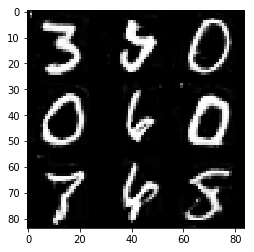

Epoch 2/2... Discriminator Loss: 2.2956... Generator Loss: 0.1355
Epoch 2/2... Discriminator Loss: 1.4353... Generator Loss: 0.5025
Epoch 2/2... Discriminator Loss: 2.1637... Generator Loss: 0.1610
Epoch 2/2... Discriminator Loss: 1.3777... Generator Loss: 0.6367
Epoch 2/2... Discriminator Loss: 1.9641... Generator Loss: 0.2079
Epoch 2/2... Discriminator Loss: 1.8990... Generator Loss: 0.2386
Epoch 2/2... Discriminator Loss: 1.7312... Generator Loss: 0.3082
Epoch 2/2... Discriminator Loss: 1.6240... Generator Loss: 0.3649
Epoch 2/2... Discriminator Loss: 1.0301... Generator Loss: 0.8711
Epoch 2/2... Discriminator Loss: 2.8356... Generator Loss: 0.0859
Epoch 2/2... Discriminator Loss: 1.3222... Generator Loss: 0.5345
Epoch 2/2... Discriminator Loss: 1.6492... Generator Loss: 0.4039
Epoch 2/2... Discriminator Loss: 1.9185... Generator Loss: 0.2663
Epoch 2/2... Discriminator Loss: 1.8254... Generator Loss: 0.2856
Epoch 2/2... Discriminator Loss: 1.4451... Generator Loss: 0.4486
Epoch 2/2.

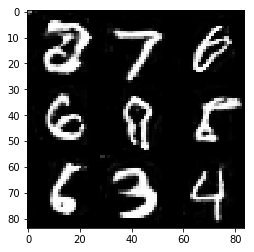

Epoch 2/2... Discriminator Loss: 2.8554... Generator Loss: 0.0842
Epoch 2/2... Discriminator Loss: 2.2523... Generator Loss: 0.1598
Epoch 2/2... Discriminator Loss: 1.6856... Generator Loss: 0.8884
Epoch 2/2... Discriminator Loss: 2.3747... Generator Loss: 0.1670
Epoch 2/2... Discriminator Loss: 3.3629... Generator Loss: 0.0534
Epoch 2/2... Discriminator Loss: 2.0258... Generator Loss: 0.7324
Epoch 2/2... Discriminator Loss: 3.0331... Generator Loss: 0.0694
Epoch 2/2... Discriminator Loss: 1.3173... Generator Loss: 0.6583
Epoch 2/2... Discriminator Loss: 1.2304... Generator Loss: 0.7214
Epoch 2/2... Discriminator Loss: 2.1662... Generator Loss: 0.1751
Epoch 2/2... Discriminator Loss: 2.4258... Generator Loss: 0.1549
Epoch 2/2... Discriminator Loss: 1.9749... Generator Loss: 0.2343
Epoch 2/2... Discriminator Loss: 1.9192... Generator Loss: 0.2718
Epoch 2/2... Discriminator Loss: 2.0723... Generator Loss: 0.2068
Epoch 2/2... Discriminator Loss: 1.9107... Generator Loss: 0.2581
Epoch 2/2.

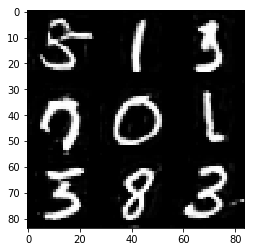

Epoch 2/2... Discriminator Loss: 2.2652... Generator Loss: 0.1745
Epoch 2/2... Discriminator Loss: 2.3208... Generator Loss: 0.2184
Epoch 2/2... Discriminator Loss: 1.1459... Generator Loss: 0.6773
Epoch 2/2... Discriminator Loss: 2.0428... Generator Loss: 0.2882
Epoch 2/2... Discriminator Loss: 2.1064... Generator Loss: 0.2120
Epoch 2/2... Discriminator Loss: 2.1553... Generator Loss: 0.2257
Epoch 2/2... Discriminator Loss: 1.5164... Generator Loss: 0.4394
Epoch 2/2... Discriminator Loss: 2.1255... Generator Loss: 0.1980
Epoch 2/2... Discriminator Loss: 2.0737... Generator Loss: 0.2228
Epoch 2/2... Discriminator Loss: 1.7115... Generator Loss: 0.4232
Epoch 2/2... Discriminator Loss: 2.0364... Generator Loss: 0.1911
Epoch 2/2... Discriminator Loss: 2.5649... Generator Loss: 0.1303
Epoch 2/2... Discriminator Loss: 2.2767... Generator Loss: 0.1954
Epoch 2/2... Discriminator Loss: 1.4888... Generator Loss: 0.4318
Epoch 2/2... Discriminator Loss: 0.6954... Generator Loss: 1.5027
Epoch 2/2.

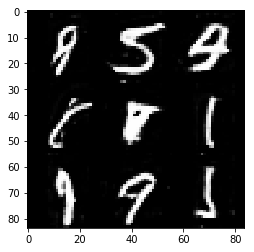

Epoch 2/2... Discriminator Loss: 1.1921... Generator Loss: 0.6509
Epoch 2/2... Discriminator Loss: 1.0846... Generator Loss: 0.8031
Epoch 2/2... Discriminator Loss: 1.6591... Generator Loss: 0.2878
Epoch 2/2... Discriminator Loss: 1.8209... Generator Loss: 0.3055
Epoch 2/2... Discriminator Loss: 2.0191... Generator Loss: 0.2743
Epoch 2/2... Discriminator Loss: 1.9619... Generator Loss: 0.2343
Epoch 2/2... Discriminator Loss: 2.3461... Generator Loss: 0.1407
Epoch 2/2... Discriminator Loss: 1.8230... Generator Loss: 0.4612
Epoch 2/2... Discriminator Loss: 2.8901... Generator Loss: 0.1149
Epoch 2/2... Discriminator Loss: 1.3223... Generator Loss: 0.8122
Epoch 2/2... Discriminator Loss: 2.4094... Generator Loss: 0.1321
Epoch 2/2... Discriminator Loss: 3.0552... Generator Loss: 0.0816
Epoch 2/2... Discriminator Loss: 1.8528... Generator Loss: 0.5530
Epoch 2/2... Discriminator Loss: 2.1479... Generator Loss: 0.2118
Epoch 2/2... Discriminator Loss: 2.0840... Generator Loss: 0.1796
Epoch 2/2.

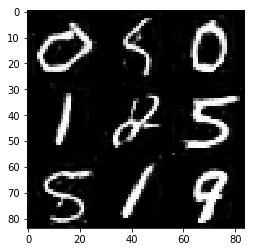

Epoch 2/2... Discriminator Loss: 1.5399... Generator Loss: 0.5076
Epoch 2/2... Discriminator Loss: 2.6064... Generator Loss: 0.1090
Epoch 2/2... Discriminator Loss: 1.9958... Generator Loss: 0.3050
Epoch 2/2... Discriminator Loss: 1.6949... Generator Loss: 0.4938
Epoch 2/2... Discriminator Loss: 1.7152... Generator Loss: 0.3530
Epoch 2/2... Discriminator Loss: 2.0793... Generator Loss: 0.1928
Epoch 2/2... Discriminator Loss: 1.6071... Generator Loss: 0.3184
Epoch 2/2... Discriminator Loss: 1.7286... Generator Loss: 0.3998
Epoch 2/2... Discriminator Loss: 1.4704... Generator Loss: 0.4115
Epoch 2/2... Discriminator Loss: 1.8437... Generator Loss: 0.2795
Epoch 2/2... Discriminator Loss: 2.1315... Generator Loss: 0.2053
Epoch 2/2... Discriminator Loss: 2.2837... Generator Loss: 0.1584
Epoch 2/2... Discriminator Loss: 2.5637... Generator Loss: 0.1337
Epoch 2/2... Discriminator Loss: 2.4634... Generator Loss: 0.2130
Epoch 2/2... Discriminator Loss: 1.5021... Generator Loss: 0.4663
Epoch 2/2.

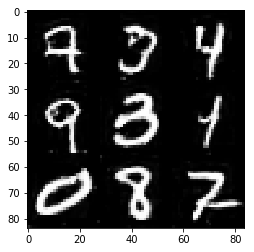

Epoch 2/2... Discriminator Loss: 3.1997... Generator Loss: 0.0603
Epoch 2/2... Discriminator Loss: 2.1951... Generator Loss: 0.1777
Epoch 2/2... Discriminator Loss: 1.9031... Generator Loss: 1.2094
Epoch 2/2... Discriminator Loss: 1.9531... Generator Loss: 0.3090
Epoch 2/2... Discriminator Loss: 2.5141... Generator Loss: 0.1536
Epoch 2/2... Discriminator Loss: 2.4384... Generator Loss: 0.2398
Epoch 2/2... Discriminator Loss: 1.2675... Generator Loss: 0.7528
Epoch 2/2... Discriminator Loss: 3.0840... Generator Loss: 0.0889
Epoch 2/2... Discriminator Loss: 1.6889... Generator Loss: 0.7681
Epoch 2/2... Discriminator Loss: 2.6766... Generator Loss: 0.1271
Epoch 2/2... Discriminator Loss: 1.8261... Generator Loss: 0.3271
Epoch 2/2... Discriminator Loss: 1.3193... Generator Loss: 0.4847
Epoch 2/2... Discriminator Loss: 2.4095... Generator Loss: 0.1484
Epoch 2/2... Discriminator Loss: 1.9353... Generator Loss: 0.2492
Epoch 2/2... Discriminator Loss: 1.5391... Generator Loss: 0.5434
Epoch 2/2.

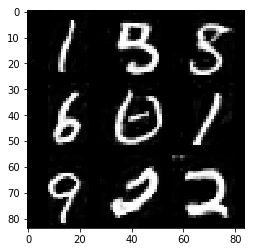

Epoch 2/2... Discriminator Loss: 1.5062... Generator Loss: 0.6166
Epoch 2/2... Discriminator Loss: 2.4098... Generator Loss: 0.2187
Epoch 2/2... Discriminator Loss: 2.0478... Generator Loss: 0.2663
Epoch 2/2... Discriminator Loss: 2.3276... Generator Loss: 0.1654
Epoch 2/2... Discriminator Loss: 1.9741... Generator Loss: 0.3059
Epoch 2/2... Discriminator Loss: 1.2848... Generator Loss: 0.6409
Epoch 2/2... Discriminator Loss: 2.6627... Generator Loss: 0.1236
Epoch 2/2... Discriminator Loss: 2.4088... Generator Loss: 0.1491
Epoch 2/2... Discriminator Loss: 2.0158... Generator Loss: 0.2433
Epoch 2/2... Discriminator Loss: 2.6021... Generator Loss: 0.1195
Epoch 2/2... Discriminator Loss: 2.2743... Generator Loss: 0.1587
Epoch 2/2... Discriminator Loss: 1.3705... Generator Loss: 0.5247
Epoch 2/2... Discriminator Loss: 2.0540... Generator Loss: 0.1943
Epoch 2/2... Discriminator Loss: 2.1955... Generator Loss: 0.3107
Epoch 2/2... Discriminator Loss: 1.9451... Generator Loss: 0.2749
Epoch 2/2.

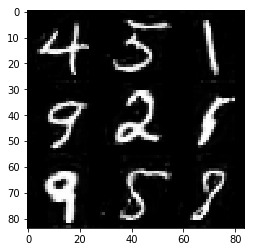

Epoch 2/2... Discriminator Loss: 1.9350... Generator Loss: 0.2836
Epoch 2/2... Discriminator Loss: 2.1429... Generator Loss: 0.1924
Epoch 2/2... Discriminator Loss: 1.8937... Generator Loss: 0.2615
Epoch 2/2... Discriminator Loss: 1.5582... Generator Loss: 0.4331
Epoch 2/2... Discriminator Loss: 2.0242... Generator Loss: 0.2504
Epoch 2/2... Discriminator Loss: 1.9361... Generator Loss: 0.2530
Epoch 2/2... Discriminator Loss: 1.9130... Generator Loss: 0.2580
Epoch 2/2... Discriminator Loss: 1.5818... Generator Loss: 0.3606
Epoch 2/2... Discriminator Loss: 1.2603... Generator Loss: 0.5166
Epoch 2/2... Discriminator Loss: 2.6908... Generator Loss: 0.0905
Epoch 2/2... Discriminator Loss: 2.3098... Generator Loss: 0.1499
Epoch 2/2... Discriminator Loss: 1.8214... Generator Loss: 0.2745
Epoch 2/2... Discriminator Loss: 2.0366... Generator Loss: 0.2218
Epoch 2/2... Discriminator Loss: 0.9789... Generator Loss: 1.0646
Epoch 2/2... Discriminator Loss: 2.0576... Generator Loss: 0.2707
Epoch 2/2.

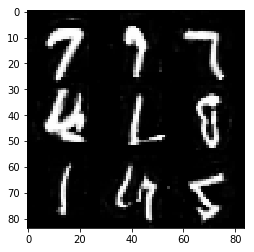

Epoch 2/2... Discriminator Loss: 1.4497... Generator Loss: 0.4932
Epoch 2/2... Discriminator Loss: 2.1251... Generator Loss: 0.1855
Epoch 2/2... Discriminator Loss: 2.6308... Generator Loss: 0.1049
Epoch 2/2... Discriminator Loss: 1.4002... Generator Loss: 0.4971
Epoch 2/2... Discriminator Loss: 2.3049... Generator Loss: 0.1844
Epoch 2/2... Discriminator Loss: 2.3788... Generator Loss: 0.1593
Epoch 2/2... Discriminator Loss: 1.8631... Generator Loss: 0.3340
Epoch 2/2... Discriminator Loss: 2.3221... Generator Loss: 0.1543
Epoch 2/2... Discriminator Loss: 1.4787... Generator Loss: 0.4452
Epoch 2/2... Discriminator Loss: 1.8928... Generator Loss: 0.4146
Epoch 2/2... Discriminator Loss: 3.0742... Generator Loss: 0.0754
Epoch 2/2... Discriminator Loss: 2.8737... Generator Loss: 0.0996
Epoch 2/2... Discriminator Loss: 2.0910... Generator Loss: 0.4756
Epoch 2/2... Discriminator Loss: 1.8330... Generator Loss: 0.2676
Epoch 2/2... Discriminator Loss: 2.4306... Generator Loss: 0.1460
Epoch 2/2.

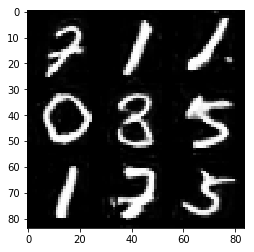

Epoch 2/2... Discriminator Loss: 1.3392... Generator Loss: 0.6011
Epoch 2/2... Discriminator Loss: 1.3814... Generator Loss: 0.5268
Epoch 2/2... Discriminator Loss: 1.6780... Generator Loss: 0.4370
Epoch 2/2... Discriminator Loss: 1.7893... Generator Loss: 0.3245
Epoch 2/2... Discriminator Loss: 2.4827... Generator Loss: 0.1849
Epoch 2/2... Discriminator Loss: 2.0830... Generator Loss: 0.2306
Epoch 2/2... Discriminator Loss: 1.3435... Generator Loss: 0.5203
Epoch 2/2... Discriminator Loss: 2.3753... Generator Loss: 0.1640
Epoch 2/2... Discriminator Loss: 2.1314... Generator Loss: 0.1629
Epoch 2/2... Discriminator Loss: 2.2983... Generator Loss: 0.2138
Epoch 2/2... Discriminator Loss: 1.7876... Generator Loss: 0.3795
Epoch 2/2... Discriminator Loss: 2.2273... Generator Loss: 0.1598
Epoch 2/2... Discriminator Loss: 2.2692... Generator Loss: 0.1596
Epoch 2/2... Discriminator Loss: 1.7697... Generator Loss: 0.3037
Epoch 2/2... Discriminator Loss: 2.0003... Generator Loss: 0.2357
Epoch 2/2.

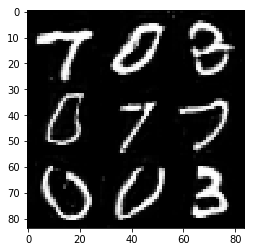

Epoch 2/2... Discriminator Loss: 2.2308... Generator Loss: 0.2863
Epoch 2/2... Discriminator Loss: 2.9240... Generator Loss: 0.0737
Epoch 2/2... Discriminator Loss: 2.8088... Generator Loss: 0.1225
Epoch 2/2... Discriminator Loss: 1.7232... Generator Loss: 0.4364
Epoch 2/2... Discriminator Loss: 2.3738... Generator Loss: 0.2280
Epoch 2/2... Discriminator Loss: 2.7647... Generator Loss: 0.0971
Epoch 2/2... Discriminator Loss: 2.4042... Generator Loss: 0.7881
Epoch 2/2... Discriminator Loss: 3.3286... Generator Loss: 0.0721
Epoch 2/2... Discriminator Loss: 2.8255... Generator Loss: 0.0897
Epoch 2/2... Discriminator Loss: 2.6154... Generator Loss: 0.2180
Epoch 2/2... Discriminator Loss: 2.1151... Generator Loss: 0.2264
Epoch 2/2... Discriminator Loss: 2.7580... Generator Loss: 0.0901
Epoch 2/2... Discriminator Loss: 1.8532... Generator Loss: 0.2761
Epoch 2/2... Discriminator Loss: 1.0056... Generator Loss: 0.8019
Epoch 2/2... Discriminator Loss: 1.5032... Generator Loss: 0.4653
Epoch 2/2.

In [14]:
batch_size = 32
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))

with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,mnist_dataset.shape, mnist_dataset.image_mode)


### CelebA
在 CelebA 上运行你的 GANs 模型。在一般的GPU上运行每次迭代大约需要 20 分钟。你可以运行整个迭代，或者当 GANs 开始产生真实人脸图像时停止它。

Epoch 1/1... Discriminator Loss: 7.9764... Generator Loss: 0.0050
Epoch 1/1... Discriminator Loss: 5.6208... Generator Loss: 0.0051
Epoch 1/1... Discriminator Loss: 6.6246... Generator Loss: 0.2724
Epoch 1/1... Discriminator Loss: 9.3154... Generator Loss: 0.0006
Epoch 1/1... Discriminator Loss: 4.6234... Generator Loss: 0.0347
Epoch 1/1... Discriminator Loss: 4.5145... Generator Loss: 0.3242
Epoch 1/1... Discriminator Loss: 4.9530... Generator Loss: 0.0107
Epoch 1/1... Discriminator Loss: 3.4626... Generator Loss: 0.1283
Epoch 1/1... Discriminator Loss: 3.6202... Generator Loss: 0.0469
Epoch 1/1... Discriminator Loss: 3.1907... Generator Loss: 0.3819
Epoch 1/1... Discriminator Loss: 3.5518... Generator Loss: 0.0546
Epoch 1/1... Discriminator Loss: 3.4007... Generator Loss: 0.0997
Epoch 1/1... Discriminator Loss: 3.8588... Generator Loss: 0.3602
Epoch 1/1... Discriminator Loss: 4.1101... Generator Loss: 0.0235
Epoch 1/1... Discriminator Loss: 3.7543... Generator Loss: 0.1621
Epoch 1/1.

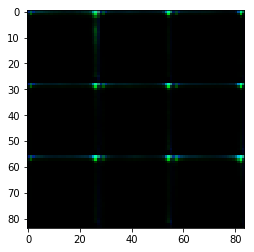

Epoch 1/1... Discriminator Loss: 1.7406... Generator Loss: 0.3786
Epoch 1/1... Discriminator Loss: 1.7148... Generator Loss: 0.4356
Epoch 1/1... Discriminator Loss: 1.8526... Generator Loss: 0.4327
Epoch 1/1... Discriminator Loss: 1.9435... Generator Loss: 0.3359
Epoch 1/1... Discriminator Loss: 1.7489... Generator Loss: 0.5604
Epoch 1/1... Discriminator Loss: 2.0000... Generator Loss: 0.5655
Epoch 1/1... Discriminator Loss: 1.9205... Generator Loss: 0.4938
Epoch 1/1... Discriminator Loss: 1.6568... Generator Loss: 0.5679
Epoch 1/1... Discriminator Loss: 1.6039... Generator Loss: 0.4615
Epoch 1/1... Discriminator Loss: 1.6239... Generator Loss: 0.5808
Epoch 1/1... Discriminator Loss: 1.6888... Generator Loss: 0.5380
Epoch 1/1... Discriminator Loss: 1.5617... Generator Loss: 0.5592
Epoch 1/1... Discriminator Loss: 1.4970... Generator Loss: 0.4965
Epoch 1/1... Discriminator Loss: 1.5863... Generator Loss: 0.5317
Epoch 1/1... Discriminator Loss: 1.6975... Generator Loss: 0.4907
Epoch 1/1.

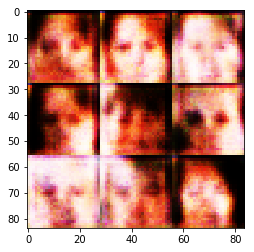

Epoch 1/1... Discriminator Loss: 1.5424... Generator Loss: 0.6910
Epoch 1/1... Discriminator Loss: 1.6182... Generator Loss: 0.4552
Epoch 1/1... Discriminator Loss: 1.6068... Generator Loss: 0.4846
Epoch 1/1... Discriminator Loss: 1.6481... Generator Loss: 0.5667
Epoch 1/1... Discriminator Loss: 1.5665... Generator Loss: 0.5492
Epoch 1/1... Discriminator Loss: 1.9882... Generator Loss: 0.4220
Epoch 1/1... Discriminator Loss: 2.0923... Generator Loss: 0.3923
Epoch 1/1... Discriminator Loss: 1.6120... Generator Loss: 0.6738
Epoch 1/1... Discriminator Loss: 1.6729... Generator Loss: 0.4180
Epoch 1/1... Discriminator Loss: 1.6309... Generator Loss: 0.4795
Epoch 1/1... Discriminator Loss: 1.5150... Generator Loss: 0.7159
Epoch 1/1... Discriminator Loss: 1.4928... Generator Loss: 0.6235
Epoch 1/1... Discriminator Loss: 1.5384... Generator Loss: 0.5821
Epoch 1/1... Discriminator Loss: 1.4960... Generator Loss: 0.6014
Epoch 1/1... Discriminator Loss: 1.5246... Generator Loss: 0.5660
Epoch 1/1.

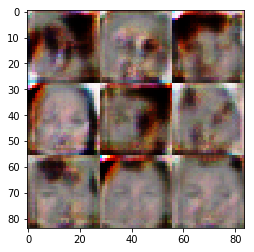

Epoch 1/1... Discriminator Loss: 1.5879... Generator Loss: 0.5149
Epoch 1/1... Discriminator Loss: 1.5967... Generator Loss: 0.6333
Epoch 1/1... Discriminator Loss: 1.6947... Generator Loss: 0.4201
Epoch 1/1... Discriminator Loss: 1.6521... Generator Loss: 0.4977
Epoch 1/1... Discriminator Loss: 1.7456... Generator Loss: 0.7368
Epoch 1/1... Discriminator Loss: 1.6556... Generator Loss: 0.5014
Epoch 1/1... Discriminator Loss: 1.6038... Generator Loss: 0.5526
Epoch 1/1... Discriminator Loss: 1.6989... Generator Loss: 0.5234
Epoch 1/1... Discriminator Loss: 1.9035... Generator Loss: 0.3264
Epoch 1/1... Discriminator Loss: 1.6085... Generator Loss: 0.6393
Epoch 1/1... Discriminator Loss: 1.6204... Generator Loss: 0.5567
Epoch 1/1... Discriminator Loss: 1.6259... Generator Loss: 0.4563
Epoch 1/1... Discriminator Loss: 1.6984... Generator Loss: 0.5395
Epoch 1/1... Discriminator Loss: 1.7671... Generator Loss: 0.4627
Epoch 1/1... Discriminator Loss: 1.6599... Generator Loss: 0.5145
Epoch 1/1.

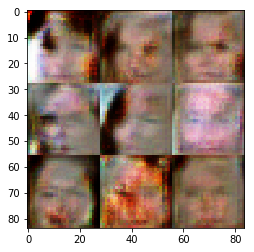

Epoch 1/1... Discriminator Loss: 1.4552... Generator Loss: 0.6817
Epoch 1/1... Discriminator Loss: 1.5901... Generator Loss: 0.5247
Epoch 1/1... Discriminator Loss: 1.5285... Generator Loss: 0.6009
Epoch 1/1... Discriminator Loss: 1.5508... Generator Loss: 0.5699
Epoch 1/1... Discriminator Loss: 1.5601... Generator Loss: 0.6031
Epoch 1/1... Discriminator Loss: 1.6867... Generator Loss: 0.5238
Epoch 1/1... Discriminator Loss: 1.7086... Generator Loss: 0.4215
Epoch 1/1... Discriminator Loss: 1.6771... Generator Loss: 0.5503
Epoch 1/1... Discriminator Loss: 1.6013... Generator Loss: 0.5623
Epoch 1/1... Discriminator Loss: 1.6217... Generator Loss: 0.4578
Epoch 1/1... Discriminator Loss: 1.5827... Generator Loss: 0.4767
Epoch 1/1... Discriminator Loss: 1.6608... Generator Loss: 0.4968
Epoch 1/1... Discriminator Loss: 1.6727... Generator Loss: 0.6184
Epoch 1/1... Discriminator Loss: 1.5024... Generator Loss: 0.6553
Epoch 1/1... Discriminator Loss: 1.4865... Generator Loss: 0.5733
Epoch 1/1.

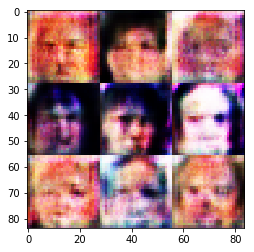

Epoch 1/1... Discriminator Loss: 1.6174... Generator Loss: 0.6512
Epoch 1/1... Discriminator Loss: 1.6180... Generator Loss: 0.5163
Epoch 1/1... Discriminator Loss: 1.5088... Generator Loss: 0.6474
Epoch 1/1... Discriminator Loss: 1.5431... Generator Loss: 0.6373
Epoch 1/1... Discriminator Loss: 1.5199... Generator Loss: 0.6167
Epoch 1/1... Discriminator Loss: 1.6346... Generator Loss: 0.4769
Epoch 1/1... Discriminator Loss: 1.5663... Generator Loss: 0.5764
Epoch 1/1... Discriminator Loss: 1.5649... Generator Loss: 0.5558
Epoch 1/1... Discriminator Loss: 1.5408... Generator Loss: 0.4631
Epoch 1/1... Discriminator Loss: 1.4784... Generator Loss: 0.5540
Epoch 1/1... Discriminator Loss: 1.5320... Generator Loss: 0.6122
Epoch 1/1... Discriminator Loss: 1.4277... Generator Loss: 0.6715
Epoch 1/1... Discriminator Loss: 1.5323... Generator Loss: 0.4503
Epoch 1/1... Discriminator Loss: 1.5504... Generator Loss: 0.7106
Epoch 1/1... Discriminator Loss: 1.5474... Generator Loss: 0.5691
Epoch 1/1.

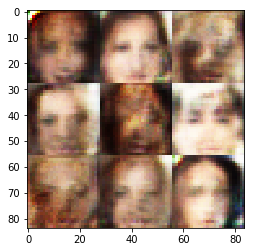

Epoch 1/1... Discriminator Loss: 1.5012... Generator Loss: 0.6702
Epoch 1/1... Discriminator Loss: 1.4699... Generator Loss: 0.6026
Epoch 1/1... Discriminator Loss: 1.4851... Generator Loss: 0.5709
Epoch 1/1... Discriminator Loss: 1.5281... Generator Loss: 0.5590
Epoch 1/1... Discriminator Loss: 1.5235... Generator Loss: 0.6310
Epoch 1/1... Discriminator Loss: 1.5946... Generator Loss: 0.5281
Epoch 1/1... Discriminator Loss: 1.5841... Generator Loss: 0.5398
Epoch 1/1... Discriminator Loss: 1.5853... Generator Loss: 0.5549
Epoch 1/1... Discriminator Loss: 1.4751... Generator Loss: 0.5832
Epoch 1/1... Discriminator Loss: 1.5364... Generator Loss: 0.6322
Epoch 1/1... Discriminator Loss: 1.4733... Generator Loss: 0.5759
Epoch 1/1... Discriminator Loss: 1.5689... Generator Loss: 0.6443
Epoch 1/1... Discriminator Loss: 1.5425... Generator Loss: 0.6775
Epoch 1/1... Discriminator Loss: 1.5611... Generator Loss: 0.4674
Epoch 1/1... Discriminator Loss: 1.5592... Generator Loss: 0.5745
Epoch 1/1.

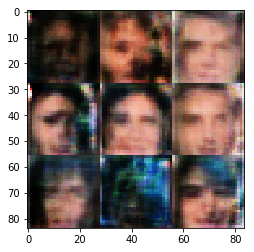

Epoch 1/1... Discriminator Loss: 1.5297... Generator Loss: 0.4989
Epoch 1/1... Discriminator Loss: 1.5770... Generator Loss: 0.6254
Epoch 1/1... Discriminator Loss: 1.5583... Generator Loss: 0.7177
Epoch 1/1... Discriminator Loss: 1.5447... Generator Loss: 0.5974
Epoch 1/1... Discriminator Loss: 1.4842... Generator Loss: 0.6143
Epoch 1/1... Discriminator Loss: 1.5380... Generator Loss: 0.5379
Epoch 1/1... Discriminator Loss: 1.4549... Generator Loss: 0.6343
Epoch 1/1... Discriminator Loss: 1.4861... Generator Loss: 0.5967
Epoch 1/1... Discriminator Loss: 1.4963... Generator Loss: 0.5769
Epoch 1/1... Discriminator Loss: 1.4662... Generator Loss: 0.6202
Epoch 1/1... Discriminator Loss: 1.4693... Generator Loss: 0.6460
Epoch 1/1... Discriminator Loss: 1.4970... Generator Loss: 0.4936
Epoch 1/1... Discriminator Loss: 1.5209... Generator Loss: 0.5745
Epoch 1/1... Discriminator Loss: 1.4663... Generator Loss: 0.5853
Epoch 1/1... Discriminator Loss: 1.6161... Generator Loss: 0.5168
Epoch 1/1.

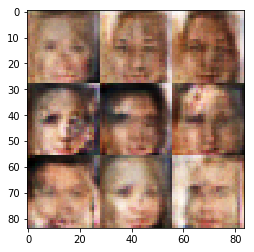

Epoch 1/1... Discriminator Loss: 1.4527... Generator Loss: 0.6014
Epoch 1/1... Discriminator Loss: 1.4963... Generator Loss: 0.5392
Epoch 1/1... Discriminator Loss: 1.4592... Generator Loss: 0.6689
Epoch 1/1... Discriminator Loss: 1.5079... Generator Loss: 0.6259
Epoch 1/1... Discriminator Loss: 1.6695... Generator Loss: 0.4243
Epoch 1/1... Discriminator Loss: 1.5030... Generator Loss: 0.6186
Epoch 1/1... Discriminator Loss: 1.5068... Generator Loss: 0.5784
Epoch 1/1... Discriminator Loss: 1.5499... Generator Loss: 0.5687
Epoch 1/1... Discriminator Loss: 1.6067... Generator Loss: 0.4941
Epoch 1/1... Discriminator Loss: 1.5186... Generator Loss: 0.5680
Epoch 1/1... Discriminator Loss: 1.5247... Generator Loss: 0.6378
Epoch 1/1... Discriminator Loss: 1.5803... Generator Loss: 0.5948
Epoch 1/1... Discriminator Loss: 1.5257... Generator Loss: 0.6463
Epoch 1/1... Discriminator Loss: 1.4866... Generator Loss: 0.5837
Epoch 1/1... Discriminator Loss: 1.6111... Generator Loss: 0.5005
Epoch 1/1.

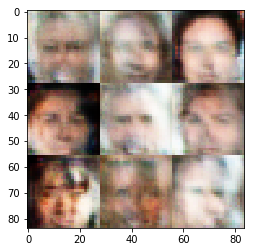

Epoch 1/1... Discriminator Loss: 1.5525... Generator Loss: 0.5208
Epoch 1/1... Discriminator Loss: 1.5461... Generator Loss: 0.6595
Epoch 1/1... Discriminator Loss: 1.4926... Generator Loss: 0.6894
Epoch 1/1... Discriminator Loss: 1.5503... Generator Loss: 0.6164
Epoch 1/1... Discriminator Loss: 1.5512... Generator Loss: 0.6222
Epoch 1/1... Discriminator Loss: 1.5685... Generator Loss: 0.5141
Epoch 1/1... Discriminator Loss: 1.6833... Generator Loss: 0.5012
Epoch 1/1... Discriminator Loss: 1.6170... Generator Loss: 0.6243
Epoch 1/1... Discriminator Loss: 1.5137... Generator Loss: 0.5446
Epoch 1/1... Discriminator Loss: 1.4926... Generator Loss: 0.6462
Epoch 1/1... Discriminator Loss: 1.4772... Generator Loss: 0.5909
Epoch 1/1... Discriminator Loss: 1.5592... Generator Loss: 0.5621
Epoch 1/1... Discriminator Loss: 1.5363... Generator Loss: 0.5617
Epoch 1/1... Discriminator Loss: 1.5321... Generator Loss: 0.4781
Epoch 1/1... Discriminator Loss: 1.5249... Generator Loss: 0.6304
Epoch 1/1.

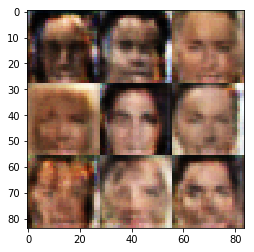

Epoch 1/1... Discriminator Loss: 1.5516... Generator Loss: 0.5951
Epoch 1/1... Discriminator Loss: 1.5208... Generator Loss: 0.6958
Epoch 1/1... Discriminator Loss: 1.5160... Generator Loss: 0.5630
Epoch 1/1... Discriminator Loss: 1.5191... Generator Loss: 0.5366
Epoch 1/1... Discriminator Loss: 1.5110... Generator Loss: 0.7431
Epoch 1/1... Discriminator Loss: 1.4497... Generator Loss: 0.6091
Epoch 1/1... Discriminator Loss: 1.4320... Generator Loss: 0.6252
Epoch 1/1... Discriminator Loss: 1.4703... Generator Loss: 0.6282
Epoch 1/1... Discriminator Loss: 1.5263... Generator Loss: 0.6060
Epoch 1/1... Discriminator Loss: 1.5261... Generator Loss: 0.6526
Epoch 1/1... Discriminator Loss: 1.5285... Generator Loss: 0.6193
Epoch 1/1... Discriminator Loss: 1.5575... Generator Loss: 0.5444
Epoch 1/1... Discriminator Loss: 1.5499... Generator Loss: 0.5997
Epoch 1/1... Discriminator Loss: 1.4728... Generator Loss: 0.5558
Epoch 1/1... Discriminator Loss: 1.5132... Generator Loss: 0.5957
Epoch 1/1.

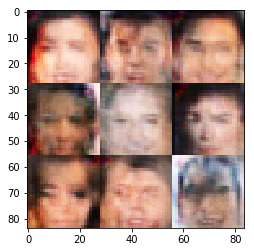

Epoch 1/1... Discriminator Loss: 1.4912... Generator Loss: 0.5485
Epoch 1/1... Discriminator Loss: 1.4870... Generator Loss: 0.5712
Epoch 1/1... Discriminator Loss: 1.4755... Generator Loss: 0.7326
Epoch 1/1... Discriminator Loss: 1.4690... Generator Loss: 0.5889
Epoch 1/1... Discriminator Loss: 1.4605... Generator Loss: 0.5631
Epoch 1/1... Discriminator Loss: 1.5210... Generator Loss: 0.6538
Epoch 1/1... Discriminator Loss: 1.5218... Generator Loss: 0.5801
Epoch 1/1... Discriminator Loss: 1.5378... Generator Loss: 0.4912
Epoch 1/1... Discriminator Loss: 1.4996... Generator Loss: 0.6444
Epoch 1/1... Discriminator Loss: 1.4597... Generator Loss: 0.5756
Epoch 1/1... Discriminator Loss: 1.4494... Generator Loss: 0.6672
Epoch 1/1... Discriminator Loss: 1.4818... Generator Loss: 0.5863
Epoch 1/1... Discriminator Loss: 1.5472... Generator Loss: 0.5634
Epoch 1/1... Discriminator Loss: 1.4716... Generator Loss: 0.7130
Epoch 1/1... Discriminator Loss: 1.4578... Generator Loss: 0.6773
Epoch 1/1.

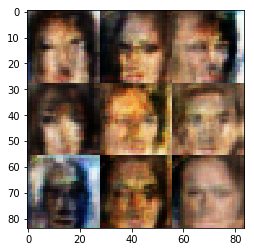

Epoch 1/1... Discriminator Loss: 1.4236... Generator Loss: 0.6331
Epoch 1/1... Discriminator Loss: 1.4515... Generator Loss: 0.5654
Epoch 1/1... Discriminator Loss: 1.5155... Generator Loss: 0.5043
Epoch 1/1... Discriminator Loss: 1.4635... Generator Loss: 0.6688
Epoch 1/1... Discriminator Loss: 1.4862... Generator Loss: 0.6508
Epoch 1/1... Discriminator Loss: 1.4861... Generator Loss: 0.5714
Epoch 1/1... Discriminator Loss: 1.5081... Generator Loss: 0.4872
Epoch 1/1... Discriminator Loss: 1.5105... Generator Loss: 0.6955
Epoch 1/1... Discriminator Loss: 1.5270... Generator Loss: 0.6737
Epoch 1/1... Discriminator Loss: 1.5452... Generator Loss: 0.4948
Epoch 1/1... Discriminator Loss: 1.5421... Generator Loss: 0.6479
Epoch 1/1... Discriminator Loss: 1.4515... Generator Loss: 0.7010
Epoch 1/1... Discriminator Loss: 1.4488... Generator Loss: 0.5534
Epoch 1/1... Discriminator Loss: 1.4500... Generator Loss: 0.5879
Epoch 1/1... Discriminator Loss: 1.4796... Generator Loss: 0.7479
Epoch 1/1.

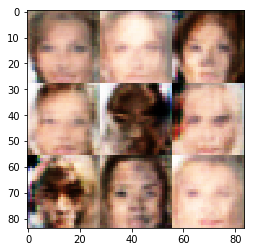

Epoch 1/1... Discriminator Loss: 1.4845... Generator Loss: 0.7705
Epoch 1/1... Discriminator Loss: 1.4538... Generator Loss: 0.6816
Epoch 1/1... Discriminator Loss: 1.4610... Generator Loss: 0.5991
Epoch 1/1... Discriminator Loss: 1.4130... Generator Loss: 0.6611
Epoch 1/1... Discriminator Loss: 1.4643... Generator Loss: 0.6529
Epoch 1/1... Discriminator Loss: 1.4950... Generator Loss: 0.5917
Epoch 1/1... Discriminator Loss: 1.4345... Generator Loss: 0.7076
Epoch 1/1... Discriminator Loss: 1.4616... Generator Loss: 0.5896
Epoch 1/1... Discriminator Loss: 1.4597... Generator Loss: 0.6245
Epoch 1/1... Discriminator Loss: 1.4843... Generator Loss: 0.6195
Epoch 1/1... Discriminator Loss: 1.4991... Generator Loss: 0.6535
Epoch 1/1... Discriminator Loss: 1.4771... Generator Loss: 0.6892
Epoch 1/1... Discriminator Loss: 1.4633... Generator Loss: 0.5529
Epoch 1/1... Discriminator Loss: 1.4309... Generator Loss: 0.5612
Epoch 1/1... Discriminator Loss: 1.4789... Generator Loss: 0.6571
Epoch 1/1.

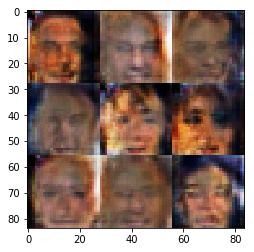

Epoch 1/1... Discriminator Loss: 1.4807... Generator Loss: 0.5262
Epoch 1/1... Discriminator Loss: 1.4237... Generator Loss: 0.5280
Epoch 1/1... Discriminator Loss: 1.4528... Generator Loss: 0.7102
Epoch 1/1... Discriminator Loss: 1.5500... Generator Loss: 0.6106
Epoch 1/1... Discriminator Loss: 1.5507... Generator Loss: 0.4893
Epoch 1/1... Discriminator Loss: 1.5380... Generator Loss: 0.5459
Epoch 1/1... Discriminator Loss: 1.4901... Generator Loss: 0.6598
Epoch 1/1... Discriminator Loss: 1.4645... Generator Loss: 0.5804
Epoch 1/1... Discriminator Loss: 1.4781... Generator Loss: 0.5612
Epoch 1/1... Discriminator Loss: 1.4443... Generator Loss: 0.6019
Epoch 1/1... Discriminator Loss: 1.4663... Generator Loss: 0.6675
Epoch 1/1... Discriminator Loss: 1.4822... Generator Loss: 0.6136
Epoch 1/1... Discriminator Loss: 1.4844... Generator Loss: 0.5865
Epoch 1/1... Discriminator Loss: 1.5008... Generator Loss: 0.6190
Epoch 1/1... Discriminator Loss: 1.4922... Generator Loss: 0.5667
Epoch 1/1.

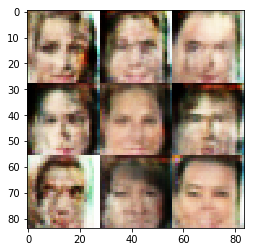

Epoch 1/1... Discriminator Loss: 1.4924... Generator Loss: 0.5714
Epoch 1/1... Discriminator Loss: 1.4547... Generator Loss: 0.6711
Epoch 1/1... Discriminator Loss: 1.4391... Generator Loss: 0.6567
Epoch 1/1... Discriminator Loss: 1.4556... Generator Loss: 0.6172
Epoch 1/1... Discriminator Loss: 1.4682... Generator Loss: 0.5388
Epoch 1/1... Discriminator Loss: 1.4565... Generator Loss: 0.6669
Epoch 1/1... Discriminator Loss: 1.4614... Generator Loss: 0.6518
Epoch 1/1... Discriminator Loss: 1.4652... Generator Loss: 0.6267
Epoch 1/1... Discriminator Loss: 1.4695... Generator Loss: 0.6801
Epoch 1/1... Discriminator Loss: 1.5229... Generator Loss: 0.5964
Epoch 1/1... Discriminator Loss: 1.4825... Generator Loss: 0.5872
Epoch 1/1... Discriminator Loss: 1.4663... Generator Loss: 0.6658
Epoch 1/1... Discriminator Loss: 1.4688... Generator Loss: 0.7424
Epoch 1/1... Discriminator Loss: 1.4740... Generator Loss: 0.5797
Epoch 1/1... Discriminator Loss: 1.4646... Generator Loss: 0.5847
Epoch 1/1.

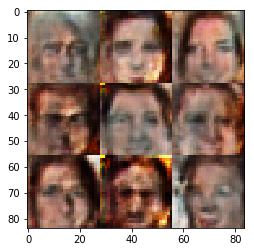

Epoch 1/1... Discriminator Loss: 1.5418... Generator Loss: 0.5837
Epoch 1/1... Discriminator Loss: 1.5094... Generator Loss: 0.6895
Epoch 1/1... Discriminator Loss: 1.4982... Generator Loss: 0.6880
Epoch 1/1... Discriminator Loss: 1.5082... Generator Loss: 0.5103
Epoch 1/1... Discriminator Loss: 1.4936... Generator Loss: 0.5638
Epoch 1/1... Discriminator Loss: 1.4739... Generator Loss: 0.6642
Epoch 1/1... Discriminator Loss: 1.5188... Generator Loss: 0.5305
Epoch 1/1... Discriminator Loss: 1.5017... Generator Loss: 0.5112
Epoch 1/1... Discriminator Loss: 1.4579... Generator Loss: 0.6457
Epoch 1/1... Discriminator Loss: 1.4865... Generator Loss: 0.6746
Epoch 1/1... Discriminator Loss: 1.4835... Generator Loss: 0.6485
Epoch 1/1... Discriminator Loss: 1.4474... Generator Loss: 0.6157
Epoch 1/1... Discriminator Loss: 1.4613... Generator Loss: 0.5284
Epoch 1/1... Discriminator Loss: 1.4843... Generator Loss: 0.6714
Epoch 1/1... Discriminator Loss: 1.5059... Generator Loss: 0.5998
Epoch 1/1.

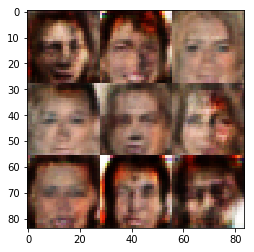

Epoch 1/1... Discriminator Loss: 1.4366... Generator Loss: 0.7550
Epoch 1/1... Discriminator Loss: 1.4450... Generator Loss: 0.6046
Epoch 1/1... Discriminator Loss: 1.4317... Generator Loss: 0.6224
Epoch 1/1... Discriminator Loss: 1.5005... Generator Loss: 0.5930
Epoch 1/1... Discriminator Loss: 1.5011... Generator Loss: 0.6944
Epoch 1/1... Discriminator Loss: 1.5204... Generator Loss: 0.5674
Epoch 1/1... Discriminator Loss: 1.4383... Generator Loss: 0.7294
Epoch 1/1... Discriminator Loss: 1.4223... Generator Loss: 0.6178
Epoch 1/1... Discriminator Loss: 1.4129... Generator Loss: 0.6130
Epoch 1/1... Discriminator Loss: 1.4539... Generator Loss: 0.5843
Epoch 1/1... Discriminator Loss: 1.4445... Generator Loss: 0.6452
Epoch 1/1... Discriminator Loss: 1.4148... Generator Loss: 0.7079
Epoch 1/1... Discriminator Loss: 1.4831... Generator Loss: 0.4964
Epoch 1/1... Discriminator Loss: 1.4315... Generator Loss: 0.6949
Epoch 1/1... Discriminator Loss: 1.5060... Generator Loss: 0.6891
Epoch 1/1.

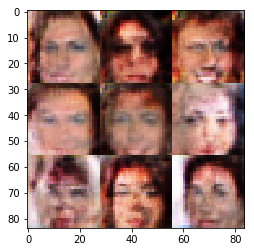

Epoch 1/1... Discriminator Loss: 1.4525... Generator Loss: 0.8100
Epoch 1/1... Discriminator Loss: 1.4395... Generator Loss: 0.5926
Epoch 1/1... Discriminator Loss: 1.4856... Generator Loss: 0.5699
Epoch 1/1... Discriminator Loss: 1.4629... Generator Loss: 0.6346
Epoch 1/1... Discriminator Loss: 1.4343... Generator Loss: 0.6352
Epoch 1/1... Discriminator Loss: 1.4761... Generator Loss: 0.6250
Epoch 1/1... Discriminator Loss: 1.4596... Generator Loss: 0.6103
Epoch 1/1... Discriminator Loss: 1.4324... Generator Loss: 0.6620
Epoch 1/1... Discriminator Loss: 1.4472... Generator Loss: 0.5969
Epoch 1/1... Discriminator Loss: 1.4602... Generator Loss: 0.6707
Epoch 1/1... Discriminator Loss: 1.4387... Generator Loss: 0.6033
Epoch 1/1... Discriminator Loss: 1.4448... Generator Loss: 0.6148
Epoch 1/1... Discriminator Loss: 1.4747... Generator Loss: 0.6198
Epoch 1/1... Discriminator Loss: 1.4737... Generator Loss: 0.6054
Epoch 1/1... Discriminator Loss: 1.4212... Generator Loss: 0.6160
Epoch 1/1.

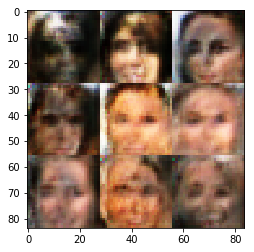

Epoch 1/1... Discriminator Loss: 1.4647... Generator Loss: 0.8143
Epoch 1/1... Discriminator Loss: 1.4366... Generator Loss: 0.5923
Epoch 1/1... Discriminator Loss: 1.4114... Generator Loss: 0.5601
Epoch 1/1... Discriminator Loss: 1.4597... Generator Loss: 0.6312
Epoch 1/1... Discriminator Loss: 1.4830... Generator Loss: 0.5604
Epoch 1/1... Discriminator Loss: 1.5367... Generator Loss: 0.6317
Epoch 1/1... Discriminator Loss: 1.4860... Generator Loss: 0.6900
Epoch 1/1... Discriminator Loss: 1.4241... Generator Loss: 0.5902
Epoch 1/1... Discriminator Loss: 1.4786... Generator Loss: 0.5812
Epoch 1/1... Discriminator Loss: 1.4818... Generator Loss: 0.6594
Epoch 1/1... Discriminator Loss: 1.4626... Generator Loss: 0.7328
Epoch 1/1... Discriminator Loss: 1.4703... Generator Loss: 0.5811
Epoch 1/1... Discriminator Loss: 1.4852... Generator Loss: 0.5083
Epoch 1/1... Discriminator Loss: 1.4304... Generator Loss: 0.6537
Epoch 1/1... Discriminator Loss: 1.4614... Generator Loss: 0.6359
Epoch 1/1.

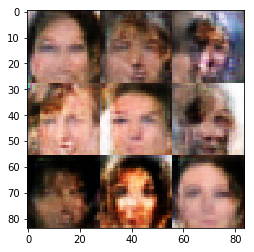

Epoch 1/1... Discriminator Loss: 1.4059... Generator Loss: 0.6193
Epoch 1/1... Discriminator Loss: 1.4315... Generator Loss: 0.7306
Epoch 1/1... Discriminator Loss: 1.4208... Generator Loss: 0.7035
Epoch 1/1... Discriminator Loss: 1.4781... Generator Loss: 0.6286
Epoch 1/1... Discriminator Loss: 1.4530... Generator Loss: 0.5787
Epoch 1/1... Discriminator Loss: 1.4662... Generator Loss: 0.6718
Epoch 1/1... Discriminator Loss: 1.4708... Generator Loss: 0.6807
Epoch 1/1... Discriminator Loss: 1.4431... Generator Loss: 0.6347
Epoch 1/1... Discriminator Loss: 1.4598... Generator Loss: 0.6047
Epoch 1/1... Discriminator Loss: 1.4543... Generator Loss: 0.6883
Epoch 1/1... Discriminator Loss: 1.4565... Generator Loss: 0.6614
Epoch 1/1... Discriminator Loss: 1.4342... Generator Loss: 0.6403
Epoch 1/1... Discriminator Loss: 1.4623... Generator Loss: 0.5910
Epoch 1/1... Discriminator Loss: 1.4757... Generator Loss: 0.6001
Epoch 1/1... Discriminator Loss: 1.4871... Generator Loss: 0.5241
Epoch 1/1.

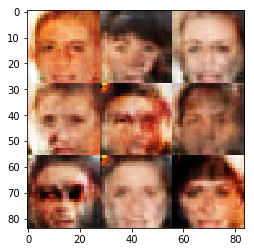

Epoch 1/1... Discriminator Loss: 1.4664... Generator Loss: 0.5874
Epoch 1/1... Discriminator Loss: 1.4522... Generator Loss: 0.5772
Epoch 1/1... Discriminator Loss: 1.4360... Generator Loss: 0.6243
Epoch 1/1... Discriminator Loss: 1.4108... Generator Loss: 0.6840
Epoch 1/1... Discriminator Loss: 1.5343... Generator Loss: 0.6454
Epoch 1/1... Discriminator Loss: 1.5241... Generator Loss: 0.7157
Epoch 1/1... Discriminator Loss: 1.5041... Generator Loss: 0.6316
Epoch 1/1... Discriminator Loss: 1.4435... Generator Loss: 0.5993
Epoch 1/1... Discriminator Loss: 1.4573... Generator Loss: 0.6163
Epoch 1/1... Discriminator Loss: 1.4640... Generator Loss: 0.6397
Epoch 1/1... Discriminator Loss: 1.4600... Generator Loss: 0.5730
Epoch 1/1... Discriminator Loss: 1.4441... Generator Loss: 0.7492
Epoch 1/1... Discriminator Loss: 1.4206... Generator Loss: 0.6290
Epoch 1/1... Discriminator Loss: 1.4286... Generator Loss: 0.6269
Epoch 1/1... Discriminator Loss: 1.4340... Generator Loss: 0.6115
Epoch 1/1.

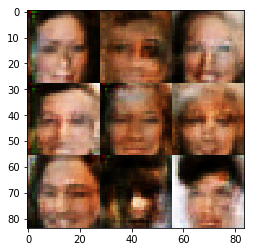

Epoch 1/1... Discriminator Loss: 1.4543... Generator Loss: 0.5778
Epoch 1/1... Discriminator Loss: 1.4461... Generator Loss: 0.6181
Epoch 1/1... Discriminator Loss: 1.4709... Generator Loss: 0.6729
Epoch 1/1... Discriminator Loss: 1.4833... Generator Loss: 0.7486
Epoch 1/1... Discriminator Loss: 1.4549... Generator Loss: 0.7302
Epoch 1/1... Discriminator Loss: 1.4332... Generator Loss: 0.6010
Epoch 1/1... Discriminator Loss: 1.4278... Generator Loss: 0.6039
Epoch 1/1... Discriminator Loss: 1.4281... Generator Loss: 0.6601
Epoch 1/1... Discriminator Loss: 1.4491... Generator Loss: 0.7372
Epoch 1/1... Discriminator Loss: 1.4677... Generator Loss: 0.5726
Epoch 1/1... Discriminator Loss: 1.4683... Generator Loss: 0.5747
Epoch 1/1... Discriminator Loss: 1.4455... Generator Loss: 0.5895
Epoch 1/1... Discriminator Loss: 1.4272... Generator Loss: 0.6624
Epoch 1/1... Discriminator Loss: 1.4193... Generator Loss: 0.7061
Epoch 1/1... Discriminator Loss: 1.4457... Generator Loss: 0.5634
Epoch 1/1.

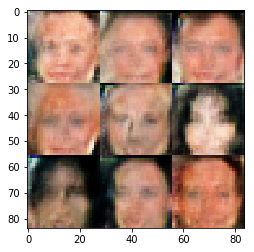

Epoch 1/1... Discriminator Loss: 1.4303... Generator Loss: 0.6064
Epoch 1/1... Discriminator Loss: 1.4319... Generator Loss: 0.6360
Epoch 1/1... Discriminator Loss: 1.4403... Generator Loss: 0.6092
Epoch 1/1... Discriminator Loss: 1.4197... Generator Loss: 0.5886
Epoch 1/1... Discriminator Loss: 1.4640... Generator Loss: 0.6094
Epoch 1/1... Discriminator Loss: 1.4579... Generator Loss: 0.5671
Epoch 1/1... Discriminator Loss: 1.4451... Generator Loss: 0.6313
Epoch 1/1... Discriminator Loss: 1.4728... Generator Loss: 0.6166
Epoch 1/1... Discriminator Loss: 1.4597... Generator Loss: 0.5940
Epoch 1/1... Discriminator Loss: 1.4758... Generator Loss: 0.6345
Epoch 1/1... Discriminator Loss: 1.4486... Generator Loss: 0.7723
Epoch 1/1... Discriminator Loss: 1.4403... Generator Loss: 0.6958
Epoch 1/1... Discriminator Loss: 1.4301... Generator Loss: 0.6610
Epoch 1/1... Discriminator Loss: 1.4391... Generator Loss: 0.7109
Epoch 1/1... Discriminator Loss: 1.4469... Generator Loss: 0.6233
Epoch 1/1.

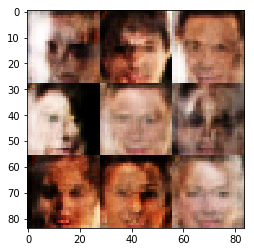

Epoch 1/1... Discriminator Loss: 1.4520... Generator Loss: 0.6042
Epoch 1/1... Discriminator Loss: 1.4855... Generator Loss: 0.4884
Epoch 1/1... Discriminator Loss: 1.4106... Generator Loss: 0.6288
Epoch 1/1... Discriminator Loss: 1.4400... Generator Loss: 0.6595
Epoch 1/1... Discriminator Loss: 1.4487... Generator Loss: 0.6372
Epoch 1/1... Discriminator Loss: 1.4586... Generator Loss: 0.6385
Epoch 1/1... Discriminator Loss: 1.4542... Generator Loss: 0.7033
Epoch 1/1... Discriminator Loss: 1.5253... Generator Loss: 0.6957
Epoch 1/1... Discriminator Loss: 1.4404... Generator Loss: 0.7371
Epoch 1/1... Discriminator Loss: 1.4904... Generator Loss: 0.6504
Epoch 1/1... Discriminator Loss: 1.4876... Generator Loss: 0.5498
Epoch 1/1... Discriminator Loss: 1.4212... Generator Loss: 0.6426
Epoch 1/1... Discriminator Loss: 1.4493... Generator Loss: 0.6592
Epoch 1/1... Discriminator Loss: 1.4441... Generator Loss: 0.6025
Epoch 1/1... Discriminator Loss: 1.4263... Generator Loss: 0.6754
Epoch 1/1.

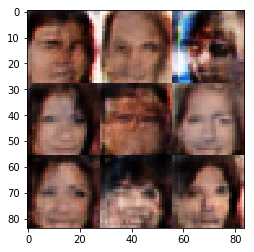

Epoch 1/1... Discriminator Loss: 1.4363... Generator Loss: 0.7261
Epoch 1/1... Discriminator Loss: 1.4159... Generator Loss: 0.7016
Epoch 1/1... Discriminator Loss: 1.4220... Generator Loss: 0.6062
Epoch 1/1... Discriminator Loss: 1.4453... Generator Loss: 0.6135
Epoch 1/1... Discriminator Loss: 1.4427... Generator Loss: 0.6345
Epoch 1/1... Discriminator Loss: 1.4951... Generator Loss: 0.6369
Epoch 1/1... Discriminator Loss: 1.4749... Generator Loss: 0.5841
Epoch 1/1... Discriminator Loss: 1.4817... Generator Loss: 0.6169
Epoch 1/1... Discriminator Loss: 1.4588... Generator Loss: 0.5685
Epoch 1/1... Discriminator Loss: 1.4520... Generator Loss: 0.5494
Epoch 1/1... Discriminator Loss: 1.4363... Generator Loss: 0.6733
Epoch 1/1... Discriminator Loss: 1.4367... Generator Loss: 0.7681
Epoch 1/1... Discriminator Loss: 1.4004... Generator Loss: 0.6709
Epoch 1/1... Discriminator Loss: 1.4427... Generator Loss: 0.5645
Epoch 1/1... Discriminator Loss: 1.4493... Generator Loss: 0.5572
Epoch 1/1.

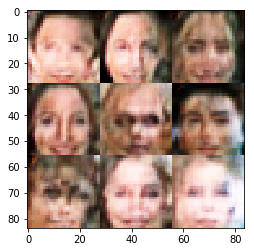

Epoch 1/1... Discriminator Loss: 1.4411... Generator Loss: 0.6517
Epoch 1/1... Discriminator Loss: 1.4748... Generator Loss: 0.6371
Epoch 1/1... Discriminator Loss: 1.4569... Generator Loss: 0.5586
Epoch 1/1... Discriminator Loss: 1.4305... Generator Loss: 0.7413
Epoch 1/1... Discriminator Loss: 1.4562... Generator Loss: 0.7492
Epoch 1/1... Discriminator Loss: 1.4480... Generator Loss: 0.6171
Epoch 1/1... Discriminator Loss: 1.4209... Generator Loss: 0.5988
Epoch 1/1... Discriminator Loss: 1.4117... Generator Loss: 0.6259
Epoch 1/1... Discriminator Loss: 1.4145... Generator Loss: 0.6842
Epoch 1/1... Discriminator Loss: 1.4165... Generator Loss: 0.6673
Epoch 1/1... Discriminator Loss: 1.4385... Generator Loss: 0.6785
Epoch 1/1... Discriminator Loss: 1.4351... Generator Loss: 0.6254
Epoch 1/1... Discriminator Loss: 1.4366... Generator Loss: 0.6650
Epoch 1/1... Discriminator Loss: 1.4336... Generator Loss: 0.6887
Epoch 1/1... Discriminator Loss: 1.4531... Generator Loss: 0.6184
Epoch 1/1.

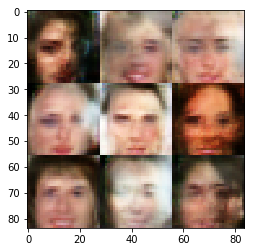

Epoch 1/1... Discriminator Loss: 1.4037... Generator Loss: 0.6518
Epoch 1/1... Discriminator Loss: 1.4276... Generator Loss: 0.6168
Epoch 1/1... Discriminator Loss: 1.4817... Generator Loss: 0.4941
Epoch 1/1... Discriminator Loss: 1.4799... Generator Loss: 0.5345
Epoch 1/1... Discriminator Loss: 1.4445... Generator Loss: 0.6554
Epoch 1/1... Discriminator Loss: 1.4540... Generator Loss: 0.7161
Epoch 1/1... Discriminator Loss: 1.4395... Generator Loss: 0.7173
Epoch 1/1... Discriminator Loss: 1.4275... Generator Loss: 0.6733
Epoch 1/1... Discriminator Loss: 1.4724... Generator Loss: 0.5692
Epoch 1/1... Discriminator Loss: 1.5125... Generator Loss: 0.4603
Epoch 1/1... Discriminator Loss: 1.4444... Generator Loss: 0.6580
Epoch 1/1... Discriminator Loss: 1.4766... Generator Loss: 0.7496
Epoch 1/1... Discriminator Loss: 1.4557... Generator Loss: 0.6756
Epoch 1/1... Discriminator Loss: 1.4335... Generator Loss: 0.6601
Epoch 1/1... Discriminator Loss: 1.4632... Generator Loss: 0.5925
Epoch 1/1.

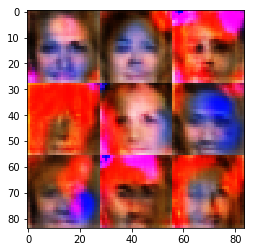

Epoch 1/1... Discriminator Loss: 1.3594... Generator Loss: 0.4846
Epoch 1/1... Discriminator Loss: 1.7366... Generator Loss: 1.0555
Epoch 1/1... Discriminator Loss: 1.2839... Generator Loss: 0.6860
Epoch 1/1... Discriminator Loss: 1.2435... Generator Loss: 0.7510
Epoch 1/1... Discriminator Loss: 1.3757... Generator Loss: 0.6671
Epoch 1/1... Discriminator Loss: 1.4715... Generator Loss: 0.5325
Epoch 1/1... Discriminator Loss: 1.5374... Generator Loss: 0.4763
Epoch 1/1... Discriminator Loss: 1.3747... Generator Loss: 0.6754
Epoch 1/1... Discriminator Loss: 1.4026... Generator Loss: 0.6218
Epoch 1/1... Discriminator Loss: 1.3656... Generator Loss: 0.5328
Epoch 1/1... Discriminator Loss: 1.3688... Generator Loss: 0.5415
Epoch 1/1... Discriminator Loss: 1.4497... Generator Loss: 0.5740
Epoch 1/1... Discriminator Loss: 1.4268... Generator Loss: 0.6608
Epoch 1/1... Discriminator Loss: 1.3888... Generator Loss: 0.5353
Epoch 1/1... Discriminator Loss: 1.4531... Generator Loss: 0.5264
Epoch 1/1.

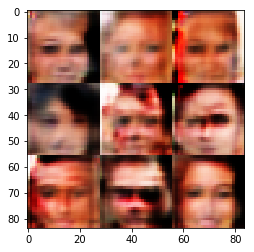

Epoch 1/1... Discriminator Loss: 1.6304... Generator Loss: 0.4687
Epoch 1/1... Discriminator Loss: 1.6320... Generator Loss: 0.6221
Epoch 1/1... Discriminator Loss: 1.6232... Generator Loss: 0.5700
Epoch 1/1... Discriminator Loss: 1.4935... Generator Loss: 0.4816
Epoch 1/1... Discriminator Loss: 1.4168... Generator Loss: 0.7013
Epoch 1/1... Discriminator Loss: 1.4883... Generator Loss: 0.7307
Epoch 1/1... Discriminator Loss: 1.4205... Generator Loss: 0.6688
Epoch 1/1... Discriminator Loss: 1.4750... Generator Loss: 0.4828
Epoch 1/1... Discriminator Loss: 1.5486... Generator Loss: 0.4578
Epoch 1/1... Discriminator Loss: 1.5084... Generator Loss: 0.5072
Epoch 1/1... Discriminator Loss: 1.4632... Generator Loss: 0.6018
Epoch 1/1... Discriminator Loss: 1.4427... Generator Loss: 0.5899
Epoch 1/1... Discriminator Loss: 1.4383... Generator Loss: 0.5859
Epoch 1/1... Discriminator Loss: 1.5239... Generator Loss: 0.5630
Epoch 1/1... Discriminator Loss: 1.5005... Generator Loss: 0.5472
Epoch 1/1.

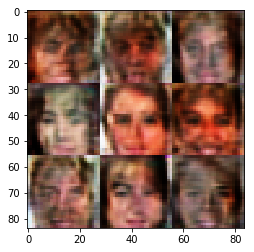

Epoch 1/1... Discriminator Loss: 1.5086... Generator Loss: 0.6546
Epoch 1/1... Discriminator Loss: 1.4825... Generator Loss: 0.6412
Epoch 1/1... Discriminator Loss: 1.4584... Generator Loss: 0.5797
Epoch 1/1... Discriminator Loss: 1.4661... Generator Loss: 0.5737
Epoch 1/1... Discriminator Loss: 1.4326... Generator Loss: 0.7552
Epoch 1/1... Discriminator Loss: 1.4395... Generator Loss: 0.6188
Epoch 1/1... Discriminator Loss: 1.4745... Generator Loss: 0.4867
Epoch 1/1... Discriminator Loss: 1.4418... Generator Loss: 0.5821
Epoch 1/1... Discriminator Loss: 1.5070... Generator Loss: 0.6112
Epoch 1/1... Discriminator Loss: 1.5097... Generator Loss: 0.5308
Epoch 1/1... Discriminator Loss: 1.5736... Generator Loss: 0.4904
Epoch 1/1... Discriminator Loss: 1.4912... Generator Loss: 0.5622
Epoch 1/1... Discriminator Loss: 1.4843... Generator Loss: 0.5490
Epoch 1/1... Discriminator Loss: 1.4784... Generator Loss: 0.5642
Epoch 1/1... Discriminator Loss: 1.4568... Generator Loss: 0.5955
Epoch 1/1.

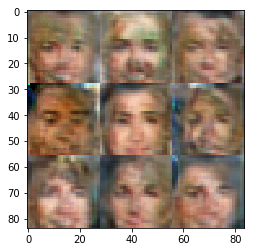

Epoch 1/1... Discriminator Loss: 1.4474... Generator Loss: 0.5783
Epoch 1/1... Discriminator Loss: 1.4561... Generator Loss: 0.5235
Epoch 1/1... Discriminator Loss: 1.5013... Generator Loss: 0.5028
Epoch 1/1... Discriminator Loss: 1.4776... Generator Loss: 0.6075
Epoch 1/1... Discriminator Loss: 1.4856... Generator Loss: 0.6535
Epoch 1/1... Discriminator Loss: 1.4794... Generator Loss: 0.6125
Epoch 1/1... Discriminator Loss: 1.4617... Generator Loss: 0.6056
Epoch 1/1... Discriminator Loss: 1.5229... Generator Loss: 0.4792
Epoch 1/1... Discriminator Loss: 1.5298... Generator Loss: 0.5594
Epoch 1/1... Discriminator Loss: 1.4832... Generator Loss: 0.7314
Epoch 1/1... Discriminator Loss: 1.4587... Generator Loss: 0.7676
Epoch 1/1... Discriminator Loss: 1.4554... Generator Loss: 0.5883
Epoch 1/1... Discriminator Loss: 1.6751... Generator Loss: 0.3707
Epoch 1/1... Discriminator Loss: 1.5677... Generator Loss: 0.4851
Epoch 1/1... Discriminator Loss: 1.4702... Generator Loss: 0.7155
Epoch 1/1.

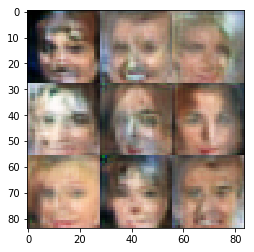

Epoch 1/1... Discriminator Loss: 1.4925... Generator Loss: 0.6050
Epoch 1/1... Discriminator Loss: 1.5806... Generator Loss: 0.4563
Epoch 1/1... Discriminator Loss: 1.6409... Generator Loss: 0.4206
Epoch 1/1... Discriminator Loss: 1.5419... Generator Loss: 0.5306
Epoch 1/1... Discriminator Loss: 1.4883... Generator Loss: 0.5758
Epoch 1/1... Discriminator Loss: 1.5127... Generator Loss: 0.5980
Epoch 1/1... Discriminator Loss: 1.4823... Generator Loss: 0.6278
Epoch 1/1... Discriminator Loss: 1.4956... Generator Loss: 0.5684
Epoch 1/1... Discriminator Loss: 1.5477... Generator Loss: 0.5757
Epoch 1/1... Discriminator Loss: 1.4397... Generator Loss: 0.6686
Epoch 1/1... Discriminator Loss: 1.4838... Generator Loss: 0.6464
Epoch 1/1... Discriminator Loss: 1.4812... Generator Loss: 0.6594
Epoch 1/1... Discriminator Loss: 1.4862... Generator Loss: 0.6502
Epoch 1/1... Discriminator Loss: 1.5028... Generator Loss: 0.5977
Epoch 1/1... Discriminator Loss: 1.5158... Generator Loss: 0.5546
Epoch 1/1.

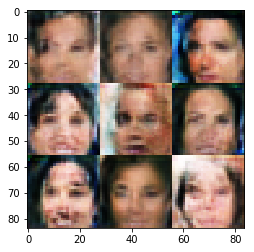

Epoch 1/1... Discriminator Loss: 1.4401... Generator Loss: 0.6981
Epoch 1/1... Discriminator Loss: 1.4428... Generator Loss: 0.6622
Epoch 1/1... Discriminator Loss: 1.4522... Generator Loss: 0.6497
Epoch 1/1... Discriminator Loss: 1.4754... Generator Loss: 0.6441
Epoch 1/1... Discriminator Loss: 1.4767... Generator Loss: 0.6263
Epoch 1/1... Discriminator Loss: 1.4922... Generator Loss: 0.5997
Epoch 1/1... Discriminator Loss: 1.4874... Generator Loss: 0.6047
Epoch 1/1... Discriminator Loss: 1.4149... Generator Loss: 0.6274
Epoch 1/1... Discriminator Loss: 1.4363... Generator Loss: 0.6274
Epoch 1/1... Discriminator Loss: 1.4244... Generator Loss: 0.6947
Epoch 1/1... Discriminator Loss: 1.4565... Generator Loss: 0.6705
Epoch 1/1... Discriminator Loss: 1.4335... Generator Loss: 0.6017
Epoch 1/1... Discriminator Loss: 1.4762... Generator Loss: 0.5303
Epoch 1/1... Discriminator Loss: 1.4915... Generator Loss: 0.5187
Epoch 1/1... Discriminator Loss: 1.4696... Generator Loss: 0.5406
Epoch 1/1.

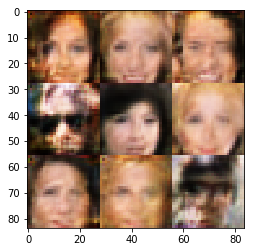

Epoch 1/1... Discriminator Loss: 1.4980... Generator Loss: 0.5191
Epoch 1/1... Discriminator Loss: 1.4765... Generator Loss: 0.5386
Epoch 1/1... Discriminator Loss: 1.4672... Generator Loss: 0.5886
Epoch 1/1... Discriminator Loss: 1.4334... Generator Loss: 0.6659
Epoch 1/1... Discriminator Loss: 1.4656... Generator Loss: 0.6593
Epoch 1/1... Discriminator Loss: 1.4446... Generator Loss: 0.6506
Epoch 1/1... Discriminator Loss: 1.4481... Generator Loss: 0.6152
Epoch 1/1... Discriminator Loss: 1.4975... Generator Loss: 0.5645
Epoch 1/1... Discriminator Loss: 1.5379... Generator Loss: 0.5696
Epoch 1/1... Discriminator Loss: 1.4630... Generator Loss: 0.6438
Epoch 1/1... Discriminator Loss: 1.4910... Generator Loss: 0.6429
Epoch 1/1... Discriminator Loss: 1.4881... Generator Loss: 0.6708
Epoch 1/1... Discriminator Loss: 1.4440... Generator Loss: 0.6389
Epoch 1/1... Discriminator Loss: 1.4336... Generator Loss: 0.5866
Epoch 1/1... Discriminator Loss: 1.4583... Generator Loss: 0.5725
Epoch 1/1.

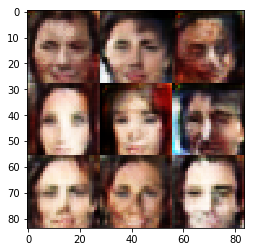

Epoch 1/1... Discriminator Loss: 1.4934... Generator Loss: 0.5139
Epoch 1/1... Discriminator Loss: 1.5171... Generator Loss: 0.6325
Epoch 1/1... Discriminator Loss: 1.4763... Generator Loss: 0.7501
Epoch 1/1... Discriminator Loss: 1.4521... Generator Loss: 0.7030
Epoch 1/1... Discriminator Loss: 1.4425... Generator Loss: 0.6918
Epoch 1/1... Discriminator Loss: 1.4242... Generator Loss: 0.6623
Epoch 1/1... Discriminator Loss: 1.4684... Generator Loss: 0.6496
Epoch 1/1... Discriminator Loss: 1.4189... Generator Loss: 0.7089
Epoch 1/1... Discriminator Loss: 1.4462... Generator Loss: 0.6863
Epoch 1/1... Discriminator Loss: 1.4093... Generator Loss: 0.6927
Epoch 1/1... Discriminator Loss: 1.4308... Generator Loss: 0.7084
Epoch 1/1... Discriminator Loss: 1.4458... Generator Loss: 0.6561
Epoch 1/1... Discriminator Loss: 1.4465... Generator Loss: 0.6214
Epoch 1/1... Discriminator Loss: 1.4303... Generator Loss: 0.6075
Epoch 1/1... Discriminator Loss: 1.4235... Generator Loss: 0.6366
Epoch 1/1.

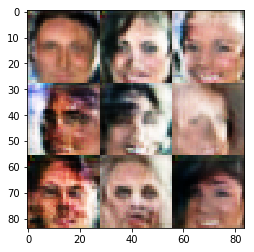

Epoch 1/1... Discriminator Loss: 1.4946... Generator Loss: 0.5820
Epoch 1/1... Discriminator Loss: 1.4790... Generator Loss: 0.5934
Epoch 1/1... Discriminator Loss: 1.4443... Generator Loss: 0.5734
Epoch 1/1... Discriminator Loss: 1.5756... Generator Loss: 0.5040
Epoch 1/1... Discriminator Loss: 1.5357... Generator Loss: 0.5349
Epoch 1/1... Discriminator Loss: 1.4592... Generator Loss: 0.5891
Epoch 1/1... Discriminator Loss: 1.4799... Generator Loss: 0.6083
Epoch 1/1... Discriminator Loss: 1.4607... Generator Loss: 0.6640
Epoch 1/1... Discriminator Loss: 1.4784... Generator Loss: 0.6919
Epoch 1/1... Discriminator Loss: 1.4579... Generator Loss: 0.6786
Epoch 1/1... Discriminator Loss: 1.4187... Generator Loss: 0.6847
Epoch 1/1... Discriminator Loss: 1.4467... Generator Loss: 0.6560
Epoch 1/1... Discriminator Loss: 1.4303... Generator Loss: 0.5975
Epoch 1/1... Discriminator Loss: 1.4618... Generator Loss: 0.5426
Epoch 1/1... Discriminator Loss: 1.4505... Generator Loss: 0.5557
Epoch 1/1.

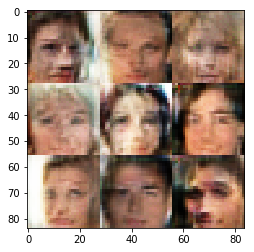

Epoch 1/1... Discriminator Loss: 1.4369... Generator Loss: 0.6595
Epoch 1/1... Discriminator Loss: 1.4405... Generator Loss: 0.6509
Epoch 1/1... Discriminator Loss: 1.4182... Generator Loss: 0.6510
Epoch 1/1... Discriminator Loss: 1.4005... Generator Loss: 0.6934
Epoch 1/1... Discriminator Loss: 1.3789... Generator Loss: 0.7117
Epoch 1/1... Discriminator Loss: 1.4182... Generator Loss: 0.6833
Epoch 1/1... Discriminator Loss: 1.4429... Generator Loss: 0.6082
Epoch 1/1... Discriminator Loss: 1.5431... Generator Loss: 0.5103
Epoch 1/1... Discriminator Loss: 1.4989... Generator Loss: 0.5664
Epoch 1/1... Discriminator Loss: 1.4407... Generator Loss: 0.6100
Epoch 1/1... Discriminator Loss: 1.4649... Generator Loss: 0.5948
Epoch 1/1... Discriminator Loss: 1.4588... Generator Loss: 0.6390
Epoch 1/1... Discriminator Loss: 1.4620... Generator Loss: 0.6116
Epoch 1/1... Discriminator Loss: 1.4778... Generator Loss: 0.5987
Epoch 1/1... Discriminator Loss: 1.4523... Generator Loss: 0.5580
Epoch 1/1.

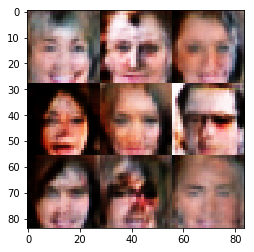

Epoch 1/1... Discriminator Loss: 1.4839... Generator Loss: 0.6441
Epoch 1/1... Discriminator Loss: 1.4775... Generator Loss: 0.5827
Epoch 1/1... Discriminator Loss: 1.4968... Generator Loss: 0.5435
Epoch 1/1... Discriminator Loss: 1.5102... Generator Loss: 0.5388
Epoch 1/1... Discriminator Loss: 1.4410... Generator Loss: 0.6386
Epoch 1/1... Discriminator Loss: 1.4856... Generator Loss: 0.6731
Epoch 1/1... Discriminator Loss: 1.4553... Generator Loss: 0.6943
Epoch 1/1... Discriminator Loss: 1.4638... Generator Loss: 0.6761
Epoch 1/1... Discriminator Loss: 1.4133... Generator Loss: 0.6757
Epoch 1/1... Discriminator Loss: 1.4400... Generator Loss: 0.6512
Epoch 1/1... Discriminator Loss: 1.4615... Generator Loss: 0.6456
Epoch 1/1... Discriminator Loss: 1.4467... Generator Loss: 0.6036
Epoch 1/1... Discriminator Loss: 1.4289... Generator Loss: 0.6082
Epoch 1/1... Discriminator Loss: 1.4400... Generator Loss: 0.5902
Epoch 1/1... Discriminator Loss: 1.4300... Generator Loss: 0.5554
Epoch 1/1.

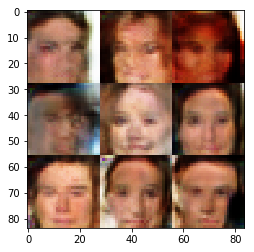

Epoch 1/1... Discriminator Loss: 1.5664... Generator Loss: 0.4506
Epoch 1/1... Discriminator Loss: 1.4137... Generator Loss: 0.6064
Epoch 1/1... Discriminator Loss: 1.4250... Generator Loss: 0.6274
Epoch 1/1... Discriminator Loss: 1.4156... Generator Loss: 0.6965
Epoch 1/1... Discriminator Loss: 1.4082... Generator Loss: 0.7026
Epoch 1/1... Discriminator Loss: 1.4226... Generator Loss: 0.6624
Epoch 1/1... Discriminator Loss: 1.4267... Generator Loss: 0.6339
Epoch 1/1... Discriminator Loss: 1.4583... Generator Loss: 0.6193
Epoch 1/1... Discriminator Loss: 1.4459... Generator Loss: 0.6018
Epoch 1/1... Discriminator Loss: 1.4342... Generator Loss: 0.6526
Epoch 1/1... Discriminator Loss: 1.4492... Generator Loss: 0.6728
Epoch 1/1... Discriminator Loss: 1.4422... Generator Loss: 0.6865
Epoch 1/1... Discriminator Loss: 1.4597... Generator Loss: 0.6494
Epoch 1/1... Discriminator Loss: 1.4263... Generator Loss: 0.6391
Epoch 1/1... Discriminator Loss: 1.4110... Generator Loss: 0.6028
Epoch 1/1.

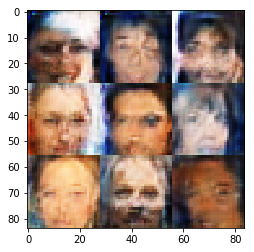

Epoch 1/1... Discriminator Loss: 1.4127... Generator Loss: 0.6585
Epoch 1/1... Discriminator Loss: 1.4421... Generator Loss: 0.6281
Epoch 1/1... Discriminator Loss: 1.3900... Generator Loss: 0.6100
Epoch 1/1... Discriminator Loss: 1.5076... Generator Loss: 0.5506
Epoch 1/1... Discriminator Loss: 1.5348... Generator Loss: 0.5356
Epoch 1/1... Discriminator Loss: 1.5546... Generator Loss: 0.5375
Epoch 1/1... Discriminator Loss: 1.4892... Generator Loss: 0.5814
Epoch 1/1... Discriminator Loss: 1.4543... Generator Loss: 0.6673
Epoch 1/1... Discriminator Loss: 1.4488... Generator Loss: 0.6990
Epoch 1/1... Discriminator Loss: 1.4566... Generator Loss: 0.6740
Epoch 1/1... Discriminator Loss: 1.4785... Generator Loss: 0.6491
Epoch 1/1... Discriminator Loss: 1.4414... Generator Loss: 0.6469
Epoch 1/1... Discriminator Loss: 1.4328... Generator Loss: 0.5966
Epoch 1/1... Discriminator Loss: 1.4513... Generator Loss: 0.5797
Epoch 1/1... Discriminator Loss: 1.4477... Generator Loss: 0.6080
Epoch 1/1.

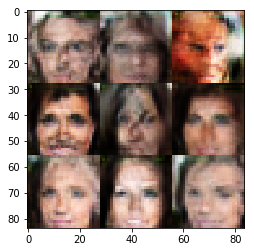

Epoch 1/1... Discriminator Loss: 1.4776... Generator Loss: 0.5814
Epoch 1/1... Discriminator Loss: 1.4496... Generator Loss: 0.6440
Epoch 1/1... Discriminator Loss: 1.4447... Generator Loss: 0.6766
Epoch 1/1... Discriminator Loss: 1.4075... Generator Loss: 0.6939
Epoch 1/1... Discriminator Loss: 1.3944... Generator Loss: 0.6957
Epoch 1/1... Discriminator Loss: 1.4252... Generator Loss: 0.6874
Epoch 1/1... Discriminator Loss: 1.4427... Generator Loss: 0.6264
Epoch 1/1... Discriminator Loss: 1.4154... Generator Loss: 0.6648
Epoch 1/1... Discriminator Loss: 1.4159... Generator Loss: 0.6653
Epoch 1/1... Discriminator Loss: 1.4329... Generator Loss: 0.6514
Epoch 1/1... Discriminator Loss: 1.4197... Generator Loss: 0.6339
Epoch 1/1... Discriminator Loss: 1.4359... Generator Loss: 0.6425
Epoch 1/1... Discriminator Loss: 1.4201... Generator Loss: 0.6398
Epoch 1/1... Discriminator Loss: 1.4410... Generator Loss: 0.6087
Epoch 1/1... Discriminator Loss: 1.4848... Generator Loss: 0.5865
Epoch 1/1.

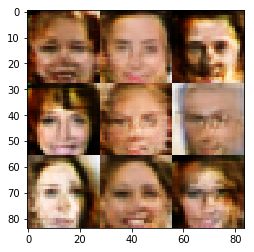

Epoch 1/1... Discriminator Loss: 1.4019... Generator Loss: 0.6561
Epoch 1/1... Discriminator Loss: 1.4594... Generator Loss: 0.6200
Epoch 1/1... Discriminator Loss: 1.4702... Generator Loss: 0.6285
Epoch 1/1... Discriminator Loss: 1.4546... Generator Loss: 0.6636
Epoch 1/1... Discriminator Loss: 1.4747... Generator Loss: 0.6628
Epoch 1/1... Discriminator Loss: 1.4173... Generator Loss: 0.6744
Epoch 1/1... Discriminator Loss: 1.4762... Generator Loss: 0.6664
Epoch 1/1... Discriminator Loss: 1.4436... Generator Loss: 0.6743
Epoch 1/1... Discriminator Loss: 1.4188... Generator Loss: 0.6669
Epoch 1/1... Discriminator Loss: 1.4142... Generator Loss: 0.6193
Epoch 1/1... Discriminator Loss: 1.4226... Generator Loss: 0.5975
Epoch 1/1... Discriminator Loss: 1.4143... Generator Loss: 0.6093
Epoch 1/1... Discriminator Loss: 1.4651... Generator Loss: 0.5570
Epoch 1/1... Discriminator Loss: 1.4803... Generator Loss: 0.5421
Epoch 1/1... Discriminator Loss: 1.4222... Generator Loss: 0.6462
Epoch 1/1.

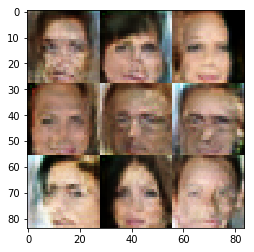

Epoch 1/1... Discriminator Loss: 1.4895... Generator Loss: 0.5984
Epoch 1/1... Discriminator Loss: 1.4799... Generator Loss: 0.5988
Epoch 1/1... Discriminator Loss: 1.4630... Generator Loss: 0.5857
Epoch 1/1... Discriminator Loss: 1.4226... Generator Loss: 0.6528
Epoch 1/1... Discriminator Loss: 1.4159... Generator Loss: 0.6938
Epoch 1/1... Discriminator Loss: 1.4017... Generator Loss: 0.7010
Epoch 1/1... Discriminator Loss: 1.4341... Generator Loss: 0.6772
Epoch 1/1... Discriminator Loss: 1.3989... Generator Loss: 0.6887
Epoch 1/1... Discriminator Loss: 1.4250... Generator Loss: 0.6805
Epoch 1/1... Discriminator Loss: 1.4446... Generator Loss: 0.6597
Epoch 1/1... Discriminator Loss: 1.4375... Generator Loss: 0.6315
Epoch 1/1... Discriminator Loss: 1.4484... Generator Loss: 0.6060
Epoch 1/1... Discriminator Loss: 1.4444... Generator Loss: 0.6173
Epoch 1/1... Discriminator Loss: 1.4515... Generator Loss: 0.5943
Epoch 1/1... Discriminator Loss: 1.5021... Generator Loss: 0.5461
Epoch 1/1.

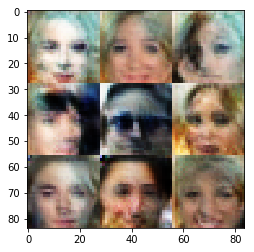

Epoch 1/1... Discriminator Loss: 1.4776... Generator Loss: 0.5572
Epoch 1/1... Discriminator Loss: 1.5393... Generator Loss: 0.5281
Epoch 1/1... Discriminator Loss: 1.4759... Generator Loss: 0.5925
Epoch 1/1... Discriminator Loss: 1.5025... Generator Loss: 0.5627
Epoch 1/1... Discriminator Loss: 1.4807... Generator Loss: 0.5730
Epoch 1/1... Discriminator Loss: 1.5675... Generator Loss: 0.5495
Epoch 1/1... Discriminator Loss: 1.4549... Generator Loss: 0.6303
Epoch 1/1... Discriminator Loss: 1.4540... Generator Loss: 0.6782
Epoch 1/1... Discriminator Loss: 1.3951... Generator Loss: 0.7148
Epoch 1/1... Discriminator Loss: 1.4495... Generator Loss: 0.7038
Epoch 1/1... Discriminator Loss: 1.4357... Generator Loss: 0.6588
Epoch 1/1... Discriminator Loss: 1.5054... Generator Loss: 0.5462
Epoch 1/1... Discriminator Loss: 1.4813... Generator Loss: 0.5204
Epoch 1/1... Discriminator Loss: 1.5793... Generator Loss: 0.4592
Epoch 1/1... Discriminator Loss: 1.4753... Generator Loss: 0.5322
Epoch 1/1.

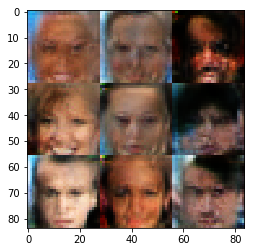

Epoch 1/1... Discriminator Loss: 1.4895... Generator Loss: 0.5749
Epoch 1/1... Discriminator Loss: 1.4326... Generator Loss: 0.6737
Epoch 1/1... Discriminator Loss: 1.4553... Generator Loss: 0.6814
Epoch 1/1... Discriminator Loss: 1.4113... Generator Loss: 0.6971
Epoch 1/1... Discriminator Loss: 1.4208... Generator Loss: 0.6504
Epoch 1/1... Discriminator Loss: 1.4352... Generator Loss: 0.6289
Epoch 1/1... Discriminator Loss: 1.4860... Generator Loss: 0.5932
Epoch 1/1... Discriminator Loss: 1.4611... Generator Loss: 0.6316
Epoch 1/1... Discriminator Loss: 1.4576... Generator Loss: 0.6368
Epoch 1/1... Discriminator Loss: 1.4237... Generator Loss: 0.6629
Epoch 1/1... Discriminator Loss: 1.4226... Generator Loss: 0.6323
Epoch 1/1... Discriminator Loss: 1.4682... Generator Loss: 0.5847
Epoch 1/1... Discriminator Loss: 1.4925... Generator Loss: 0.5610
Epoch 1/1... Discriminator Loss: 1.5051... Generator Loss: 0.5328
Epoch 1/1... Discriminator Loss: 1.4394... Generator Loss: 0.6275
Epoch 1/1.

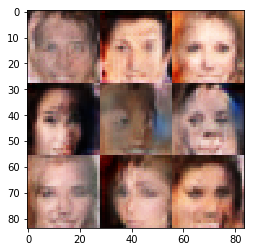

Epoch 1/1... Discriminator Loss: 1.4039... Generator Loss: 0.6321
Epoch 1/1... Discriminator Loss: 1.4234... Generator Loss: 0.6053
Epoch 1/1... Discriminator Loss: 1.4230... Generator Loss: 0.6171
Epoch 1/1... Discriminator Loss: 1.4385... Generator Loss: 0.6224
Epoch 1/1... Discriminator Loss: 1.4309... Generator Loss: 0.6270
Epoch 1/1... Discriminator Loss: 1.4334... Generator Loss: 0.6676
Epoch 1/1... Discriminator Loss: 1.4533... Generator Loss: 0.6862
Epoch 1/1... Discriminator Loss: 1.4362... Generator Loss: 0.6994
Epoch 1/1... Discriminator Loss: 1.4618... Generator Loss: 0.6935
Epoch 1/1... Discriminator Loss: 1.5302... Generator Loss: 0.6562
Epoch 1/1... Discriminator Loss: 1.4376... Generator Loss: 0.6612
Epoch 1/1... Discriminator Loss: 1.4370... Generator Loss: 0.6457
Epoch 1/1... Discriminator Loss: 1.4756... Generator Loss: 0.5638
Epoch 1/1... Discriminator Loss: 1.4675... Generator Loss: 0.5431
Epoch 1/1... Discriminator Loss: 1.5183... Generator Loss: 0.5145
Epoch 1/1.

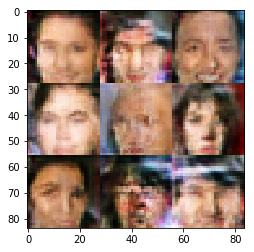

Epoch 1/1... Discriminator Loss: 1.3893... Generator Loss: 0.6709
Epoch 1/1... Discriminator Loss: 1.4474... Generator Loss: 0.5909
Epoch 1/1... Discriminator Loss: 1.4277... Generator Loss: 0.6308
Epoch 1/1... Discriminator Loss: 1.4289... Generator Loss: 0.6220
Epoch 1/1... Discriminator Loss: 1.4682... Generator Loss: 0.6071
Epoch 1/1... Discriminator Loss: 1.4444... Generator Loss: 0.6505
Epoch 1/1... Discriminator Loss: 1.4341... Generator Loss: 0.6811
Epoch 1/1... Discriminator Loss: 1.4536... Generator Loss: 0.6324
Epoch 1/1... Discriminator Loss: 1.4246... Generator Loss: 0.6638
Epoch 1/1... Discriminator Loss: 1.4451... Generator Loss: 0.6435
Epoch 1/1... Discriminator Loss: 1.4558... Generator Loss: 0.6283
Epoch 1/1... Discriminator Loss: 1.4573... Generator Loss: 0.6241
Epoch 1/1... Discriminator Loss: 1.4243... Generator Loss: 0.6462
Epoch 1/1... Discriminator Loss: 1.4366... Generator Loss: 0.6507
Epoch 1/1... Discriminator Loss: 1.4193... Generator Loss: 0.6862
Epoch 1/1.

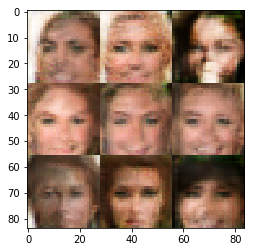

Epoch 1/1... Discriminator Loss: 1.4103... Generator Loss: 0.6951
Epoch 1/1... Discriminator Loss: 1.4288... Generator Loss: 0.7034
Epoch 1/1... Discriminator Loss: 1.4216... Generator Loss: 0.6846
Epoch 1/1... Discriminator Loss: 1.4517... Generator Loss: 0.6526
Epoch 1/1... Discriminator Loss: 1.4197... Generator Loss: 0.6208
Epoch 1/1... Discriminator Loss: 1.4606... Generator Loss: 0.5843
Epoch 1/1... Discriminator Loss: 1.4393... Generator Loss: 0.5712
Epoch 1/1... Discriminator Loss: 1.4931... Generator Loss: 0.5564
Epoch 1/1... Discriminator Loss: 1.4209... Generator Loss: 0.6320
Epoch 1/1... Discriminator Loss: 1.4237... Generator Loss: 0.6507
Epoch 1/1... Discriminator Loss: 1.4085... Generator Loss: 0.6874
Epoch 1/1... Discriminator Loss: 1.4324... Generator Loss: 0.6694
Epoch 1/1... Discriminator Loss: 1.4122... Generator Loss: 0.6516
Epoch 1/1... Discriminator Loss: 1.4556... Generator Loss: 0.6200
Epoch 1/1... Discriminator Loss: 1.4371... Generator Loss: 0.6122
Epoch 1/1.

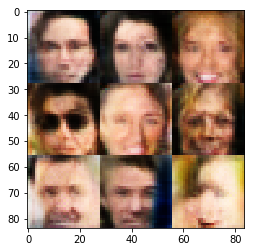

Epoch 1/1... Discriminator Loss: 1.4772... Generator Loss: 0.5624
Epoch 1/1... Discriminator Loss: 1.4394... Generator Loss: 0.5932
Epoch 1/1... Discriminator Loss: 1.5010... Generator Loss: 0.5825
Epoch 1/1... Discriminator Loss: 1.4549... Generator Loss: 0.5620
Epoch 1/1... Discriminator Loss: 1.5106... Generator Loss: 0.5695
Epoch 1/1... Discriminator Loss: 1.5111... Generator Loss: 0.5645
Epoch 1/1... Discriminator Loss: 1.5677... Generator Loss: 0.5291
Epoch 1/1... Discriminator Loss: 1.4487... Generator Loss: 0.6866
Epoch 1/1... Discriminator Loss: 1.4562... Generator Loss: 0.7113
Epoch 1/1... Discriminator Loss: 1.4552... Generator Loss: 0.7299
Epoch 1/1... Discriminator Loss: 1.4398... Generator Loss: 0.7401
Epoch 1/1... Discriminator Loss: 1.3841... Generator Loss: 0.7316
Epoch 1/1... Discriminator Loss: 1.3770... Generator Loss: 0.7063
Epoch 1/1... Discriminator Loss: 1.3445... Generator Loss: 0.6549
Epoch 1/1... Discriminator Loss: 1.3780... Generator Loss: 0.6348
Epoch 1/1.

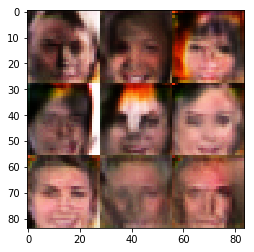

Epoch 1/1... Discriminator Loss: 1.4331... Generator Loss: 0.7289
Epoch 1/1... Discriminator Loss: 1.3926... Generator Loss: 0.7015
Epoch 1/1... Discriminator Loss: 1.3731... Generator Loss: 0.6844
Epoch 1/1... Discriminator Loss: 1.4859... Generator Loss: 0.6135
Epoch 1/1... Discriminator Loss: 1.4183... Generator Loss: 0.5802
Epoch 1/1... Discriminator Loss: 1.4340... Generator Loss: 0.6290
Epoch 1/1... Discriminator Loss: 1.3621... Generator Loss: 0.6947
Epoch 1/1... Discriminator Loss: 1.4458... Generator Loss: 0.6224
Epoch 1/1... Discriminator Loss: 1.4273... Generator Loss: 0.6197
Epoch 1/1... Discriminator Loss: 1.4176... Generator Loss: 0.6126
Epoch 1/1... Discriminator Loss: 1.5926... Generator Loss: 0.4554
Epoch 1/1... Discriminator Loss: 1.3592... Generator Loss: 0.6055
Epoch 1/1... Discriminator Loss: 1.4621... Generator Loss: 0.5306
Epoch 1/1... Discriminator Loss: 1.5265... Generator Loss: 0.5206
Epoch 1/1... Discriminator Loss: 1.3501... Generator Loss: 0.6943
Epoch 1/1.

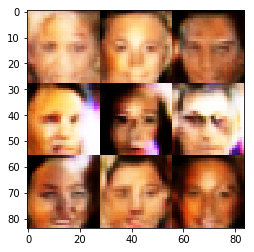

Epoch 1/1... Discriminator Loss: 1.8921... Generator Loss: 0.2318
Epoch 1/1... Discriminator Loss: 1.5018... Generator Loss: 0.6746
Epoch 1/1... Discriminator Loss: 1.5016... Generator Loss: 0.7902
Epoch 1/1... Discriminator Loss: 1.4107... Generator Loss: 0.7696
Epoch 1/1... Discriminator Loss: 1.5193... Generator Loss: 0.6343
Epoch 1/1... Discriminator Loss: 1.4067... Generator Loss: 0.6045
Epoch 1/1... Discriminator Loss: 1.5212... Generator Loss: 0.5355
Epoch 1/1... Discriminator Loss: 1.4242... Generator Loss: 0.5756
Epoch 1/1... Discriminator Loss: 1.4637... Generator Loss: 0.4990
Epoch 1/1... Discriminator Loss: 1.5617... Generator Loss: 0.4973
Epoch 1/1... Discriminator Loss: 1.4798... Generator Loss: 0.5225
Epoch 1/1... Discriminator Loss: 1.6435... Generator Loss: 0.5864
Epoch 1/1... Discriminator Loss: 1.5180... Generator Loss: 0.6677
Epoch 1/1... Discriminator Loss: 1.4749... Generator Loss: 0.6891
Epoch 1/1... Discriminator Loss: 1.4009... Generator Loss: 0.6042
Epoch 1/1.

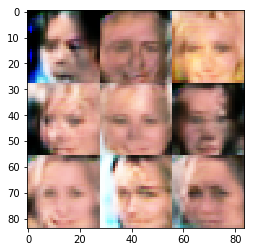

Epoch 1/1... Discriminator Loss: 1.5528... Generator Loss: 0.5089
Epoch 1/1... Discriminator Loss: 1.6024... Generator Loss: 0.4463
Epoch 1/1... Discriminator Loss: 1.4977... Generator Loss: 0.5229
Epoch 1/1... Discriminator Loss: 1.6195... Generator Loss: 0.4900
Epoch 1/1... Discriminator Loss: 1.4934... Generator Loss: 0.5421
Epoch 1/1... Discriminator Loss: 1.6359... Generator Loss: 0.4809
Epoch 1/1... Discriminator Loss: 1.6913... Generator Loss: 0.4123
Epoch 1/1... Discriminator Loss: 1.4775... Generator Loss: 0.5595
Epoch 1/1... Discriminator Loss: 1.5064... Generator Loss: 0.6068
Epoch 1/1... Discriminator Loss: 1.5224... Generator Loss: 0.5562
Epoch 1/1... Discriminator Loss: 1.4525... Generator Loss: 0.6132
Epoch 1/1... Discriminator Loss: 1.5385... Generator Loss: 0.6143
Epoch 1/1... Discriminator Loss: 1.6159... Generator Loss: 0.4858
Epoch 1/1... Discriminator Loss: 1.5434... Generator Loss: 0.4652
Epoch 1/1... Discriminator Loss: 1.4728... Generator Loss: 0.5252
Epoch 1/1.

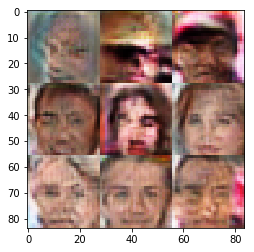

Epoch 1/1... Discriminator Loss: 1.4115... Generator Loss: 0.6149
Epoch 1/1... Discriminator Loss: 1.4710... Generator Loss: 0.5638
Epoch 1/1... Discriminator Loss: 1.5053... Generator Loss: 0.5183
Epoch 1/1... Discriminator Loss: 1.4988... Generator Loss: 0.5265
Epoch 1/1... Discriminator Loss: 1.5378... Generator Loss: 0.4614
Epoch 1/1... Discriminator Loss: 1.6810... Generator Loss: 0.3953
Epoch 1/1... Discriminator Loss: 1.7317... Generator Loss: 0.4013
Epoch 1/1... Discriminator Loss: 1.4757... Generator Loss: 0.5819
Epoch 1/1... Discriminator Loss: 1.4072... Generator Loss: 0.6711
Epoch 1/1... Discriminator Loss: 1.5190... Generator Loss: 0.6653
Epoch 1/1... Discriminator Loss: 1.4202... Generator Loss: 0.6779
Epoch 1/1... Discriminator Loss: 1.3039... Generator Loss: 0.6722
Epoch 1/1... Discriminator Loss: 1.4298... Generator Loss: 0.4849
Epoch 1/1... Discriminator Loss: 1.7331... Generator Loss: 0.3689
Epoch 1/1... Discriminator Loss: 1.6156... Generator Loss: 0.3929
Epoch 1/1.

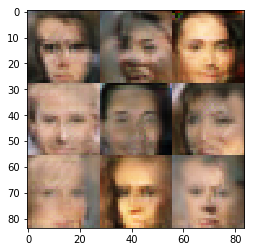

Epoch 1/1... Discriminator Loss: 1.5299... Generator Loss: 0.5158
Epoch 1/1... Discriminator Loss: 1.5265... Generator Loss: 0.5271
Epoch 1/1... Discriminator Loss: 1.5339... Generator Loss: 0.5406
Epoch 1/1... Discriminator Loss: 1.5872... Generator Loss: 0.5516
Epoch 1/1... Discriminator Loss: 1.4013... Generator Loss: 0.6563
Epoch 1/1... Discriminator Loss: 1.4700... Generator Loss: 0.6053
Epoch 1/1... Discriminator Loss: 1.4125... Generator Loss: 0.6621
Epoch 1/1... Discriminator Loss: 1.4768... Generator Loss: 0.6105
Epoch 1/1... Discriminator Loss: 1.4296... Generator Loss: 0.5244
Epoch 1/1... Discriminator Loss: 1.6838... Generator Loss: 0.4286
Epoch 1/1... Discriminator Loss: 1.5610... Generator Loss: 0.4351
Epoch 1/1... Discriminator Loss: 1.5194... Generator Loss: 0.4959
Epoch 1/1... Discriminator Loss: 1.5869... Generator Loss: 0.4874
Epoch 1/1... Discriminator Loss: 1.5371... Generator Loss: 0.5392
Epoch 1/1... Discriminator Loss: 1.5367... Generator Loss: 0.5384
Epoch 1/1.

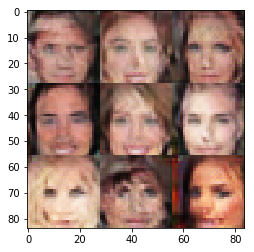

Epoch 1/1... Discriminator Loss: 1.6418... Generator Loss: 0.4440
Epoch 1/1... Discriminator Loss: 1.6387... Generator Loss: 0.4785
Epoch 1/1... Discriminator Loss: 1.4624... Generator Loss: 0.6687
Epoch 1/1... Discriminator Loss: 1.4481... Generator Loss: 0.6869
Epoch 1/1... Discriminator Loss: 1.4492... Generator Loss: 0.6659
Epoch 1/1... Discriminator Loss: 1.3354... Generator Loss: 0.6595
Epoch 1/1... Discriminator Loss: 1.5081... Generator Loss: 0.5295
Epoch 1/1... Discriminator Loss: 1.6604... Generator Loss: 0.4290
Epoch 1/1... Discriminator Loss: 1.6754... Generator Loss: 0.4136
Epoch 1/1... Discriminator Loss: 1.5845... Generator Loss: 0.5022
Epoch 1/1... Discriminator Loss: 1.5545... Generator Loss: 0.6022
Epoch 1/1... Discriminator Loss: 1.5499... Generator Loss: 0.5945
Epoch 1/1... Discriminator Loss: 1.3877... Generator Loss: 0.6293
Epoch 1/1... Discriminator Loss: 1.5263... Generator Loss: 0.5022
Epoch 1/1... Discriminator Loss: 1.7179... Generator Loss: 0.3957
Epoch 1/1.

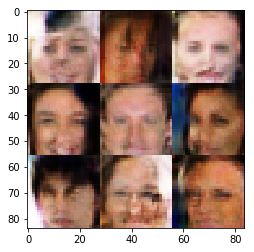

Epoch 1/1... Discriminator Loss: 1.7033... Generator Loss: 0.3926
Epoch 1/1... Discriminator Loss: 1.6775... Generator Loss: 0.4162
Epoch 1/1... Discriminator Loss: 1.5873... Generator Loss: 0.4842
Epoch 1/1... Discriminator Loss: 1.5828... Generator Loss: 0.4846
Epoch 1/1... Discriminator Loss: 1.7368... Generator Loss: 0.4296
Epoch 1/1... Discriminator Loss: 1.5076... Generator Loss: 0.6235
Epoch 1/1... Discriminator Loss: 1.3961... Generator Loss: 0.6460
Epoch 1/1... Discriminator Loss: 1.4671... Generator Loss: 0.5858
Epoch 1/1... Discriminator Loss: 1.4815... Generator Loss: 0.5714
Epoch 1/1... Discriminator Loss: 1.5968... Generator Loss: 0.5199
Epoch 1/1... Discriminator Loss: 1.5623... Generator Loss: 0.4659
Epoch 1/1... Discriminator Loss: 1.5647... Generator Loss: 0.4785
Epoch 1/1... Discriminator Loss: 1.4574... Generator Loss: 0.6021
Epoch 1/1... Discriminator Loss: 1.4663... Generator Loss: 0.6152
Epoch 1/1... Discriminator Loss: 1.4899... Generator Loss: 0.5557
Epoch 1/1.

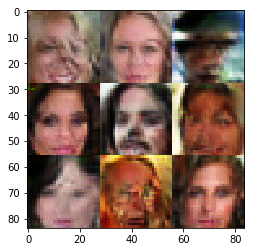

Epoch 1/1... Discriminator Loss: 1.5663... Generator Loss: 0.4929
Epoch 1/1... Discriminator Loss: 1.6271... Generator Loss: 0.4920
Epoch 1/1... Discriminator Loss: 1.5663... Generator Loss: 0.5576
Epoch 1/1... Discriminator Loss: 1.4896... Generator Loss: 0.6401
Epoch 1/1... Discriminator Loss: 1.4359... Generator Loss: 0.6950
Epoch 1/1... Discriminator Loss: 1.5110... Generator Loss: 0.6505
Epoch 1/1... Discriminator Loss: 1.4230... Generator Loss: 0.6805
Epoch 1/1... Discriminator Loss: 1.4993... Generator Loss: 0.6179
Epoch 1/1... Discriminator Loss: 1.5316... Generator Loss: 0.5687
Epoch 1/1... Discriminator Loss: 1.5628... Generator Loss: 0.5362
Epoch 1/1... Discriminator Loss: 1.4742... Generator Loss: 0.6136
Epoch 1/1... Discriminator Loss: 1.4420... Generator Loss: 0.6049
Epoch 1/1... Discriminator Loss: 1.4915... Generator Loss: 0.5846
Epoch 1/1... Discriminator Loss: 1.4627... Generator Loss: 0.6126
Epoch 1/1... Discriminator Loss: 1.4157... Generator Loss: 0.6241
Epoch 1/1.

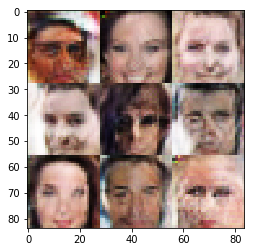

Epoch 1/1... Discriminator Loss: 1.6270... Generator Loss: 0.4323
Epoch 1/1... Discriminator Loss: 1.6567... Generator Loss: 0.4657
Epoch 1/1... Discriminator Loss: 1.5005... Generator Loss: 0.5396
Epoch 1/1... Discriminator Loss: 1.4590... Generator Loss: 0.6542
Epoch 1/1... Discriminator Loss: 1.4839... Generator Loss: 0.6229
Epoch 1/1... Discriminator Loss: 1.5061... Generator Loss: 0.6099
Epoch 1/1... Discriminator Loss: 1.4146... Generator Loss: 0.6270
Epoch 1/1... Discriminator Loss: 1.5452... Generator Loss: 0.5032
Epoch 1/1... Discriminator Loss: 1.5818... Generator Loss: 0.5045
Epoch 1/1... Discriminator Loss: 1.6512... Generator Loss: 0.4337
Epoch 1/1... Discriminator Loss: 1.6284... Generator Loss: 0.4511
Epoch 1/1... Discriminator Loss: 1.6373... Generator Loss: 0.4475
Epoch 1/1... Discriminator Loss: 1.5352... Generator Loss: 0.5457
Epoch 1/1... Discriminator Loss: 1.5161... Generator Loss: 0.5726
Epoch 1/1... Discriminator Loss: 1.5148... Generator Loss: 0.6216
Epoch 1/1.

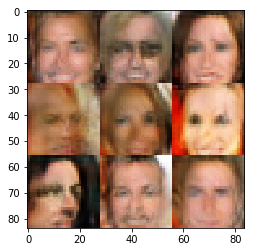

Epoch 1/1... Discriminator Loss: 1.5668... Generator Loss: 0.4995
Epoch 1/1... Discriminator Loss: 1.6578... Generator Loss: 0.4535
Epoch 1/1... Discriminator Loss: 1.5430... Generator Loss: 0.5373
Epoch 1/1... Discriminator Loss: 1.4708... Generator Loss: 0.6185
Epoch 1/1... Discriminator Loss: 1.4877... Generator Loss: 0.5946
Epoch 1/1... Discriminator Loss: 1.4759... Generator Loss: 0.5972
Epoch 1/1... Discriminator Loss: 1.5444... Generator Loss: 0.5586
Epoch 1/1... Discriminator Loss: 1.4972... Generator Loss: 0.5785
Epoch 1/1... Discriminator Loss: 1.4391... Generator Loss: 0.6009
Epoch 1/1... Discriminator Loss: 1.4738... Generator Loss: 0.5376
Epoch 1/1... Discriminator Loss: 1.5154... Generator Loss: 0.5060
Epoch 1/1... Discriminator Loss: 1.4478... Generator Loss: 0.5773
Epoch 1/1... Discriminator Loss: 1.5249... Generator Loss: 0.5580
Epoch 1/1... Discriminator Loss: 1.4909... Generator Loss: 0.6006
Epoch 1/1... Discriminator Loss: 1.4216... Generator Loss: 0.6593
Epoch 1/1.

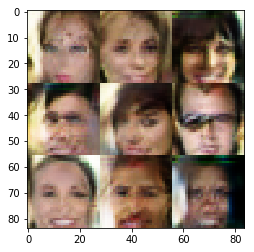

Epoch 1/1... Discriminator Loss: 1.4441... Generator Loss: 0.5812
Epoch 1/1... Discriminator Loss: 1.4283... Generator Loss: 0.5803
Epoch 1/1... Discriminator Loss: 1.4769... Generator Loss: 0.5697
Epoch 1/1... Discriminator Loss: 1.4208... Generator Loss: 0.5997
Epoch 1/1... Discriminator Loss: 1.4544... Generator Loss: 0.5942
Epoch 1/1... Discriminator Loss: 1.4774... Generator Loss: 0.5849
Epoch 1/1... Discriminator Loss: 1.4700... Generator Loss: 0.5877
Epoch 1/1... Discriminator Loss: 1.4343... Generator Loss: 0.5848
Epoch 1/1... Discriminator Loss: 1.5709... Generator Loss: 0.4854
Epoch 1/1... Discriminator Loss: 1.5456... Generator Loss: 0.5048
Epoch 1/1... Discriminator Loss: 1.5098... Generator Loss: 0.5300
Epoch 1/1... Discriminator Loss: 1.5352... Generator Loss: 0.5258
Epoch 1/1... Discriminator Loss: 1.4822... Generator Loss: 0.5739
Epoch 1/1... Discriminator Loss: 1.4848... Generator Loss: 0.5870
Epoch 1/1... Discriminator Loss: 1.4771... Generator Loss: 0.6116
Epoch 1/1.

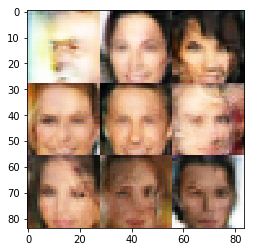

Epoch 1/1... Discriminator Loss: 1.4971... Generator Loss: 0.5769
Epoch 1/1... Discriminator Loss: 1.4267... Generator Loss: 0.6073
Epoch 1/1... Discriminator Loss: 1.5851... Generator Loss: 0.5057
Epoch 1/1... Discriminator Loss: 1.5101... Generator Loss: 0.5574
Epoch 1/1... Discriminator Loss: 1.4983... Generator Loss: 0.5660
Epoch 1/1... Discriminator Loss: 1.5300... Generator Loss: 0.5623
Epoch 1/1... Discriminator Loss: 1.4010... Generator Loss: 0.6549
Epoch 1/1... Discriminator Loss: 1.5177... Generator Loss: 0.6191
Epoch 1/1... Discriminator Loss: 1.5094... Generator Loss: 0.6212
Epoch 1/1... Discriminator Loss: 1.5493... Generator Loss: 0.5886
Epoch 1/1... Discriminator Loss: 1.4696... Generator Loss: 0.6287
Epoch 1/1... Discriminator Loss: 1.5236... Generator Loss: 0.5534
Epoch 1/1... Discriminator Loss: 1.4709... Generator Loss: 0.5505
Epoch 1/1... Discriminator Loss: 1.5508... Generator Loss: 0.5187
Epoch 1/1... Discriminator Loss: 1.4561... Generator Loss: 0.6010
Epoch 1/1.

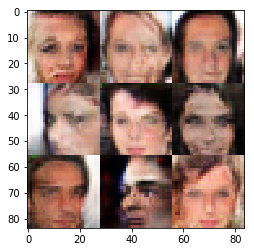

Epoch 1/1... Discriminator Loss: 1.4504... Generator Loss: 0.6182
Epoch 1/1... Discriminator Loss: 1.4662... Generator Loss: 0.5972
Epoch 1/1... Discriminator Loss: 1.4754... Generator Loss: 0.6102
Epoch 1/1... Discriminator Loss: 1.4708... Generator Loss: 0.6167
Epoch 1/1... Discriminator Loss: 1.4819... Generator Loss: 0.6344
Epoch 1/1... Discriminator Loss: 1.4195... Generator Loss: 0.6692
Epoch 1/1... Discriminator Loss: 1.4558... Generator Loss: 0.6689
Epoch 1/1... Discriminator Loss: 1.4404... Generator Loss: 0.6585
Epoch 1/1... Discriminator Loss: 1.4669... Generator Loss: 0.6391
Epoch 1/1... Discriminator Loss: 1.4428... Generator Loss: 0.6545
Epoch 1/1... Discriminator Loss: 1.4446... Generator Loss: 0.6513
Epoch 1/1... Discriminator Loss: 1.4429... Generator Loss: 0.6312
Epoch 1/1... Discriminator Loss: 1.4457... Generator Loss: 0.6299
Epoch 1/1... Discriminator Loss: 1.4760... Generator Loss: 0.5976
Epoch 1/1... Discriminator Loss: 1.4339... Generator Loss: 0.6325
Epoch 1/1.

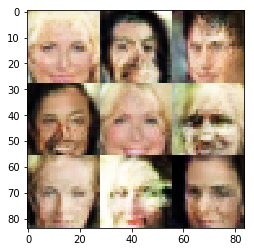

Epoch 1/1... Discriminator Loss: 1.5430... Generator Loss: 0.4863
Epoch 1/1... Discriminator Loss: 1.6314... Generator Loss: 0.4407
Epoch 1/1... Discriminator Loss: 1.5137... Generator Loss: 0.5432
Epoch 1/1... Discriminator Loss: 1.5299... Generator Loss: 0.5693
Epoch 1/1... Discriminator Loss: 1.5689... Generator Loss: 0.5019
Epoch 1/1... Discriminator Loss: 1.5139... Generator Loss: 0.5323
Epoch 1/1... Discriminator Loss: 1.5315... Generator Loss: 0.5691
Epoch 1/1... Discriminator Loss: 1.5034... Generator Loss: 0.6027
Epoch 1/1... Discriminator Loss: 1.4515... Generator Loss: 0.6760
Epoch 1/1... Discriminator Loss: 1.4538... Generator Loss: 0.6662
Epoch 1/1... Discriminator Loss: 1.4032... Generator Loss: 0.6799
Epoch 1/1... Discriminator Loss: 1.3866... Generator Loss: 0.6414
Epoch 1/1... Discriminator Loss: 1.4648... Generator Loss: 0.5969
Epoch 1/1... Discriminator Loss: 1.4654... Generator Loss: 0.6040
Epoch 1/1... Discriminator Loss: 1.4477... Generator Loss: 0.6389
Epoch 1/1.

In [12]:
batch_size = 32
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### 提交项目
提交本项目前，确保运行所有 cells 后保存该文件。

保存该文件为 "dlnd_face_generation.ipynb"， 并另存为 HTML 格式 "File" -> "Download as"。提交项目时请附带 "helper.py" 和 "problem_unittests.py" 文件。

In [13]:
print('over')

over
